In [316]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [317]:
### Direct to the correct folder
path = 'D:/files/second_part/fourmarkers_COM_version'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 241
Current features number: 71


In [318]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [319]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [320]:
raw_df = pd.DataFrame(all_list, columns = all_col_names)
df = raw_df.iloc[:, 1:]

In [321]:
df["std_AP_aCOM"]

0       32614.2866
1       34163.6249
2       27469.7845
3       29998.0408
4       45261.7965
          ...     
236     53847.0213
237    122811.5069
238     48826.3395
239     25828.8504
240     88647.5255
Name: std_AP_aCOM, Length: 241, dtype: float64

## Checking dataset quality

* balance between group
* data type
* abnormal value because of the extraction from matlab 
* missing data
* outlier

In [322]:
print("In total " + str(df.shape[0]) + " steps")

In total 241 steps


In [323]:
df.groupby("target_performance").size()

target_performance
Bad          60
Good         75
Moderate    106
dtype: int64

In [324]:
for i in df.columns:
    if df[i].dtypes != "float64":
        print(i)

sub_ID
target_performance


In [325]:
df.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  241.000000  241.000000        241.000000  241.000000  241.000000   
mean   187.505516    7.825422         11.970895  659.978578   29.098437   
std     13.535757    2.761297          1.975404   46.037926    9.495711   
min    149.500200    2.643900          6.874700  538.895500   11.356600   
max    243.887200   17.421500         19.233200  773.939300   60.169200   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   241.000000   241.000000         241.000000   241.000000   241.000000   
mean    295.623540   240.366166         323.846199  2838.306102   521.323420   
std      70.155841    67.648521          81.664496   933.417712   215.880384   
min     138.717100   128.487600         202.490300  1589.095400   200.260600   
max     721.684400   632.555800         857.903100  8483.153900  1409.908000   

       ...   min_AP_MOS  min_ML_MOS   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   241.000000  241.000000   241.000000  241.000000  235.000000   
mean   ...  -868.195979 -131.185929   596.049841  225.938607    0.870047   
std    ...   264.479646   43.451832   197.915339   54.046978    5.841348   
min    ... -1390.606900 -404.646600   198.193100  109.944200  -21.092300   
max    ...  -287.710100  -42.850400  1149.827000  497.179600   35.885600   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  235.000000  235.000000  235.000000  235.000000  235.000000  
mean     0.036648    6.816405    1.890715   24.221573    7.648036  
std      3.412968    1.762244    0.824895    6.348388    3.293394  
min     -6.574500    0.000000    0.000000    0.000000    0.000000  
max      5.332200   13.003400    4.600400   40.506100   13.291000  

[5 rows x 69 columns]

In [326]:
df_without_na = df.copy()
for ID in df["sub_ID"].unique():
    grouped_df = df[df["sub_ID"] == ID]
    for col in grouped_df.columns:
        if grouped_df[col].isna().sum() != 0:
            mean = grouped_df[col].mean()
            df_without_na[df_without_na["sub_ID"] == ID] = grouped_df.fillna(mean)
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 45
Amount of nan in current table: 0


In [327]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    190.5316      6.3043           11.8078    678.0692     23.2083   
51   sub03    196.6661      7.4817           10.1874    686.8829     27.7727   
130  sub10    185.9353      8.0743           13.6313    646.8475     29.4515   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      289.3629     148.8135           293.0445    2129.7820  ...   
51      247.0425     263.5712           306.5283    3693.6409  ...   
130     254.2330     238.6785           360.2564    3279.9453  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -119.4657    743.1187    219.7796     13.1346      2.7459    0.46076   
51    -134.9298    603.9886    223.8860      4.7664      2.0912    0.45135   
130   -237.2476    702.8617    301.3991     11.0390      1.2098    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12     1.79460    2.23210    5.78530                Good  
51     0.22064    0.63831    0.31203                 Bad  
130    0.00000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [328]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    190.5316      6.3043           11.8078    678.0692     23.2083   
51   sub03    196.6661      7.4817           10.1874    686.8829     27.7727   
130  sub10    185.9353      8.0743           13.6313    646.8475     29.4515   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      289.3629     148.8135           293.0445    2129.7820  ...   
51      247.0425     263.5712           306.5283    3693.6409  ...   
130     254.2330     238.6785           360.2564    3279.9453  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -119.4657    743.1187    219.7796     13.1346      2.7459    0.46076   
51    -134.9298    603.9886    223.8860      4.7664      2.0912    0.45135   
130   -237.2476    702.8617    301.3991     11.0390      1.2098    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12     1.79460    2.23210    5.78530                Good  
51     0.22064    0.63831    0.31203                 Bad  
130    0.00000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [329]:
df_without_outlier = df_without_na.drop(130, axis = 0)

In [330]:
std_vretical_xCOM_outlier_inx = df_without_na[(df_without_na["std_vretical_xCOM"]) > 5].index

df_without_outlier = df_without_na.drop(std_vretical_xCOM_outlier_inx, axis = 0)

In [331]:
df_without_outlier.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  241.000000  241.000000        241.000000  241.000000  241.000000   
mean   187.505516    7.825422         11.970895  659.978578   29.098437   
std     13.535757    2.761297          1.975404   46.037926    9.495711   
min    149.500200    2.643900          6.874700  538.895500   11.356600   
max    243.887200   17.421500         19.233200  773.939300   60.169200   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   241.000000   241.000000         241.000000   241.000000   241.000000   
mean    295.623540   240.366166         323.846199  2838.306102   521.323420   
std      70.155841    67.648521          81.664496   933.417712   215.880384   
min     138.717100   128.487600         202.490300  1589.095400   200.260600   
max     721.684400   632.555800         857.903100  8483.153900  1409.908000   

       ...   min_AP_MOS  min_ML_MOS   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   241.000000  241.000000   241.000000  241.000000  241.000000   
mean   ...  -868.195979 -131.185929   596.049841  225.938607    1.033600   
std    ...   264.479646   43.451832   197.915339   54.046978    5.863068   
min    ... -1390.606900 -404.646600   198.193100  109.944200  -21.092300   
max    ...  -287.710100  -42.850400  1149.827000  497.179600   35.885600   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count   241.00000  241.000000  241.000000  241.000000  241.000000  
mean      0.22095    6.831916    2.028857   23.803760    7.642842  
std       3.57047    1.758557    1.212096    6.798191    3.260604  
min      -6.57450    0.000000    0.000000    0.000000    0.000000  
max       9.01403   13.003400    9.014030   40.506100   13.291000  

[5 rows x 69 columns]

In [332]:
df_without_outlier.head()

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0  sub01    213.4662      8.8350           14.6141    762.4613     32.8951   
1  sub01    213.5305      2.9755           13.6819    758.7181     11.3566   
2  sub01    205.2074      5.9922           13.2110    733.4199     23.4083   
3  sub01    215.8366      5.4087           14.6840    761.7351     21.3881   
4  sub01    207.8313      5.5818           13.5413    742.6170     20.4367   

   std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  min_ML_MOS  \
0     295.8255     180.9047           330.0996    2272.8799  ...    -98.0258   
1     281.6698     153.5744           311.0343    2318.2098  ...   -126.8227   
2     286.7895     136.7172           293.6041    2108.8232  ...   -115.8622   
3     240.6370     170.3688           371.8024    3568.5125  ...   -119.4112   
4     335.7397     131.9642           340.5659    3722.7436  ...   -109.1963   

   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  std_ML_IA  \
0    646.5060    225.9099      1.2640      4.6668     7.9475     2.1534   
1    381.7673    261.3699      1.1772     -4.6563     8.0284     2.4178   
2    823.2821    214.5069     21.1584     -6.5745     2.6338     1.1421   
3    413.4972    251.4558     -2.8516      4.3927     7.4854     2.1760   
4    891.0632    225.6116     -1.5906     -4.7489     7.9923     2.2845   

   ROM_AP_IA  ROM_ML_IA  target_performance  
0    28.9237    12.1212                Good  
1    28.6518    11.5975                Good  
2     8.1273     3.8470                Good  
3    27.1330    11.7784                Good  
4    29.7887    11.2230                Good  

[5 rows x 71 columns]

In [333]:
df_without_outlier.columns

Index(['sub_ID', 'std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',

In [334]:
from sklearn import preprocessing
normalized_df = pd.DataFrame()
for col in df_without_outlier.columns[:]:
    try:
        normalized_df[col] = preprocessing.normalize(np.array(df_without_outlier[col]).reshape(1, -1))[0]
    except:
        normalized_df[col] = df_without_outlier[col]

In [335]:
#normalized_df

In [336]:
all_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance']]
spatiotemporal_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'target_performance'
       ]]
advanced_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

In [337]:
#x = spatiotemporal_df[spatiotemporal_df["std_AP_aCOM"] < 60000]["std_AP_aCOM"]
#x.hist()

In [338]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_df.hist(ax = ax)

In [339]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#COP_df.hist(ax = ax)

In [340]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#advanced_df.hist(ax = ax)

In [341]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_clear_df.hist(ax = ax)

In [342]:
all_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP','std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA','target_performance']]
spatiotemporal_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_clear_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP', 'target_performance'
       ]]
advanced_clear_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

## Statistical analysis

In [343]:
corr_df = spatiotemporal_df.corr()
high_corr_df = corr_df[corr_df > 0.8].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.8]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

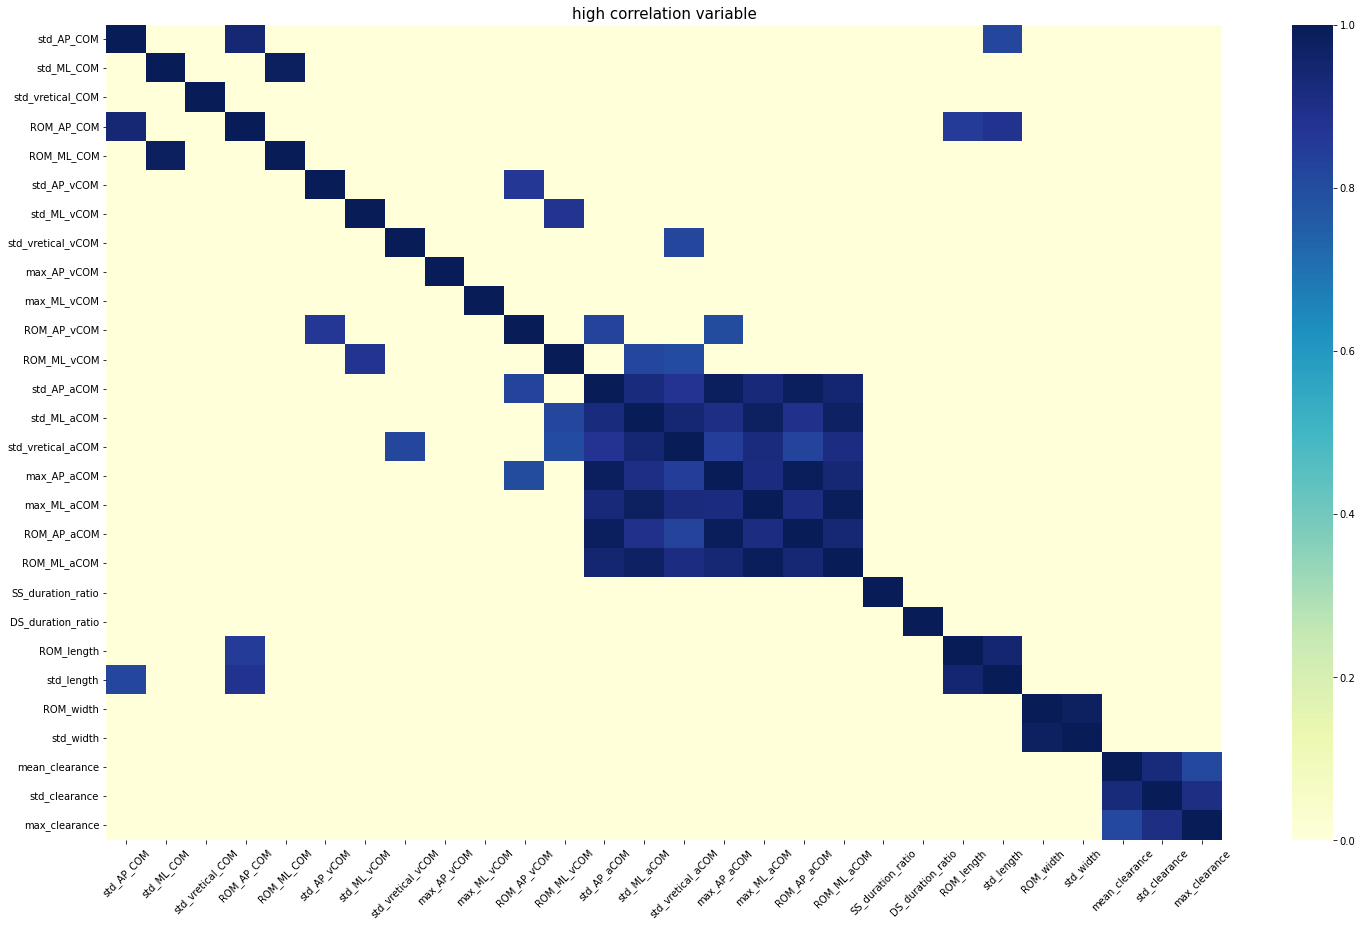

In [344]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [345]:
corr_df = COP_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

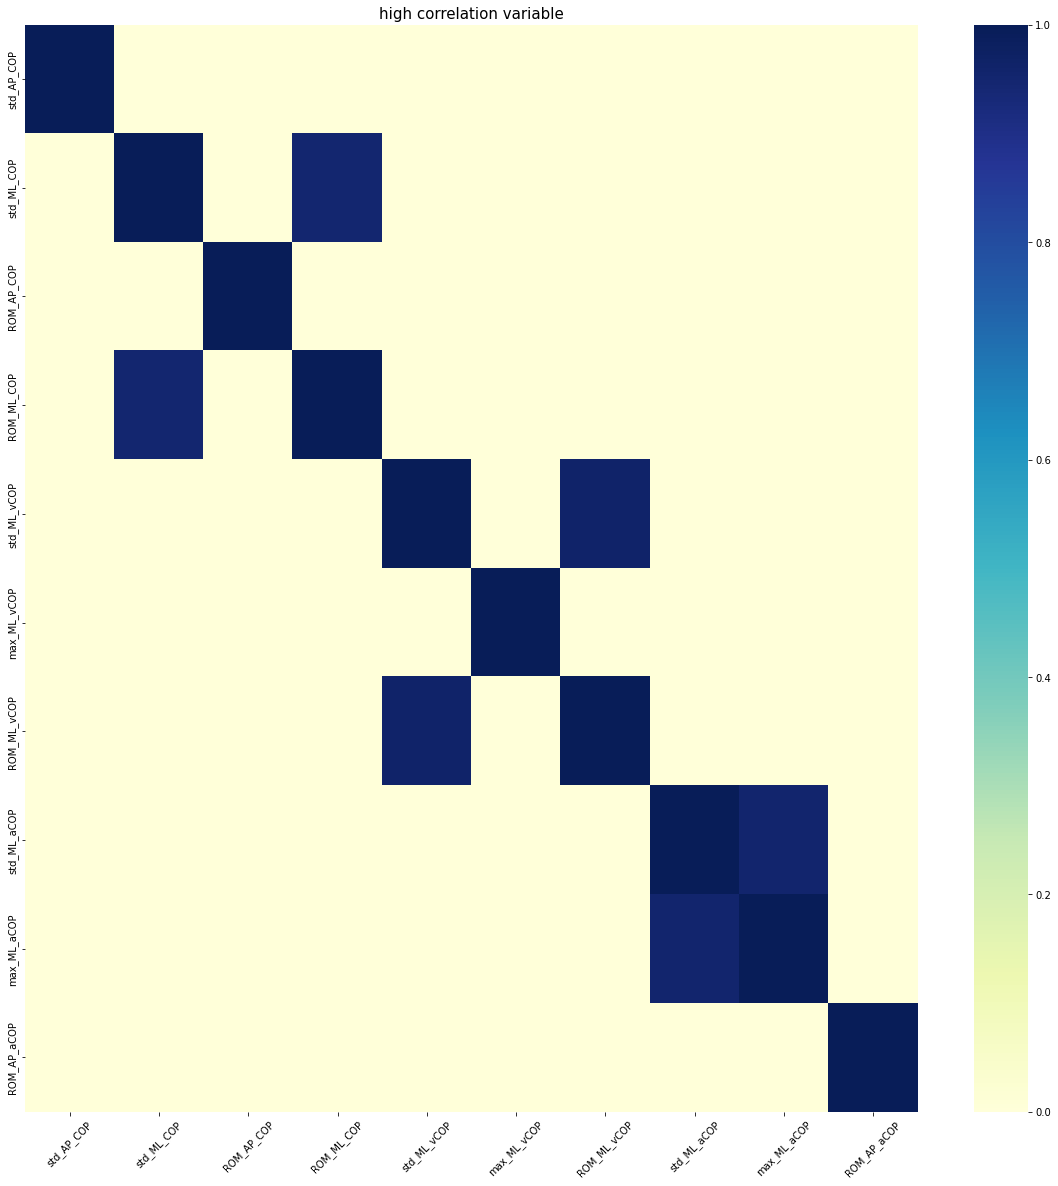

In [346]:
import seaborn as sns

fig = plt.figure(figsize = (20,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [347]:
corr_df = advanced_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

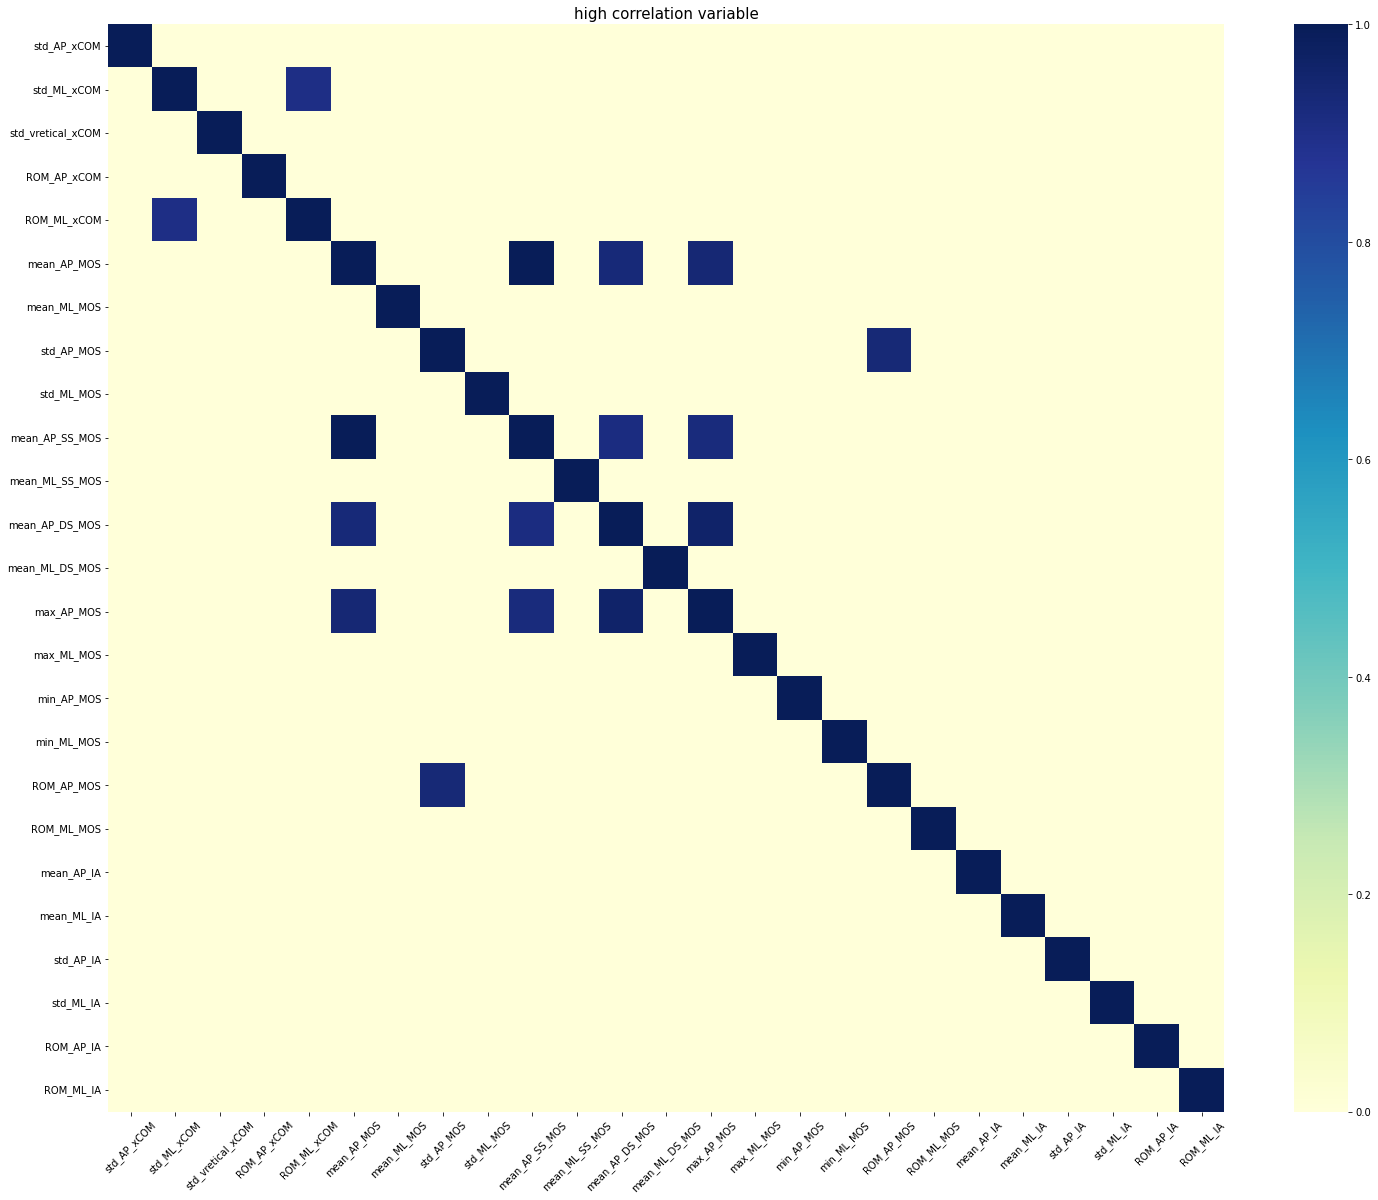

In [348]:
import seaborn as sns

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [349]:
all_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']]

spatiotemporal_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'target_performance'
       ]]

COP_clear_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'target_performance'
       ]]

advanced_clear_corr_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'target_performance'
       ]]
spa_cop_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP','target_performance'
       ]]
spa_adv_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance'
       ]]
cop_adv_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance'
       ]]
kinematic_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS','target_performance']]
non_kinematic_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'target_performance'
       ]]

Text(0.5, 1.0, 'high correlation variable')

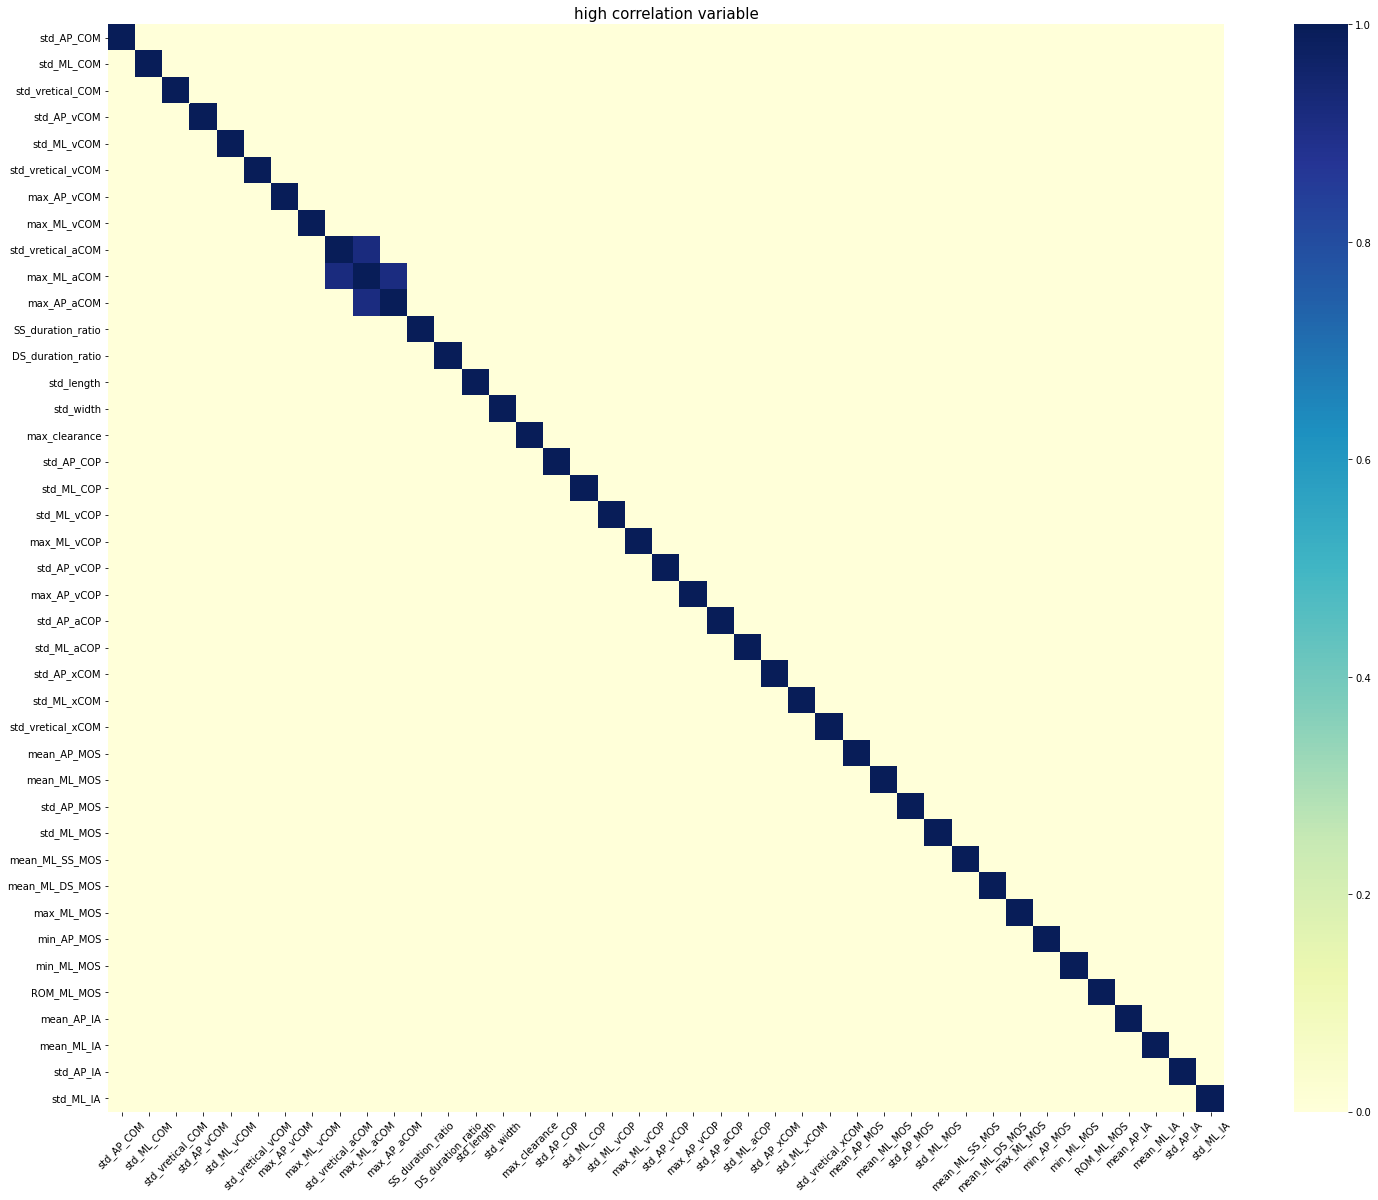

In [350]:
corr_df = all_clear_corr_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'std_AP_COM'}>,
        <AxesSubplot:title={'center':'std_ML_COM'}>,
        <AxesSubplot:title={'center':'std_vretical_COM'}>,
        <AxesSubplot:title={'center':'std_AP_vCOM'}>],
       [<AxesSubplot:title={'center':'std_ML_vCOM'}>,
        <AxesSubplot:title={'center':'std_vretical_vCOM'}>,
        <AxesSubplot:title={'center':'max_AP_vCOM'}>,
        <AxesSubplot:title={'center':'max_ML_vCOM'}>],
       [<AxesSubplot:title={'center':'std_vretical_aCOM'}>,
        <AxesSubplot:title={'center':'max_ML_aCOM'}>,
        <AxesSubplot:title={'center':'max_AP_aCOM'}>,
        <AxesSubplot:title={'center':'SS_duration_ratio'}>],
       [<AxesSubplot:title={'center':'DS_duration_ratio'}>,
        <AxesSubplot:title={'center':'std_length'}>,
        <AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'max_clearance'}>]], dtype=object)

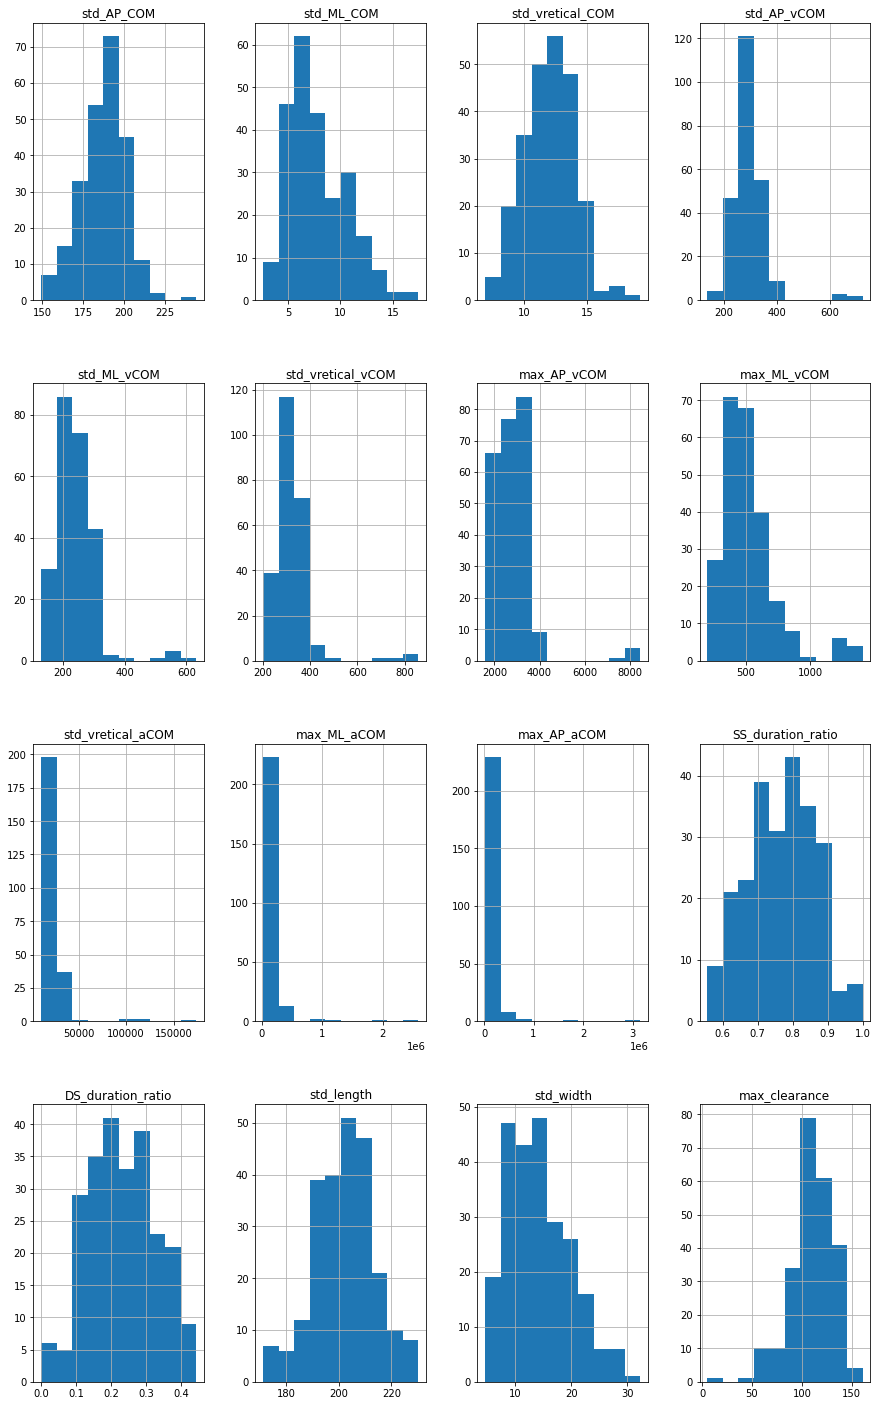

In [351]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
spatiotemporal_clear_corr_df.hist(ax = ax)

In [352]:
spatiotemporal_clear_corr_df.groupby("target_performance").describe().SS_duration_ratio

count      mean       std      min       25%       50%  \
target_performance                                                           
Bad                  60.0  0.795021  0.090203  0.64706  0.725618  0.777295   
Good                 75.0  0.756755  0.095380  0.57895  0.666670  0.769910   
Moderate            106.0  0.760111  0.099306  0.55556  0.685573  0.772810   

                         75%      max  
target_performance                     
Bad                 0.854908  1.00000  
Good                0.827255  0.97030  
Moderate            0.837770  0.94444

## Data processing

In [353]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [354]:
scaler = StandardScaler()
desired_dataset = all_clear_corr_df

In [355]:
input_df = desired_dataset.iloc[:,0:-1]
target_df = desired_dataset["target_performance"]

In [356]:
inputs = scaler.fit_transform(input_df)
targets = np.array(target_df)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [358]:
x_train.shape

(168, 41)

In [359]:
[uni_name, count] = np.unique(y_train, return_counts=True)
print("Training dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Training dataset: 
Bad 43
Good 54
Moderate 71


In [360]:
[uni_name, count] = np.unique(y_test, return_counts=True)
print("Testing dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Testing dataset: 
Bad 17
Good 21
Moderate 35


In [361]:
a = ['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']
spa_para = list(range(0, 16))
cop_para = list(range(16, 24))
advanced = list(range(24, 41))
spa_cop = spa_para + cop_para
spa_adv = spa_para + advanced
cop_adv = cop_para + advanced
kine_para = spa_para + list(range(24,37))
non_kine_para = cop_para + list(range(37,41))

In [362]:
input_df.columns[37:41]

Index(['mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA'], dtype='object')

In [363]:
all_input_df = input_df
all_input_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA']
spa_input_df = input_df.iloc[:,spa_para]
cop_input_df = input_df.iloc[:,cop_para]
adv_input_df = input_df.iloc[:,advanced]
spa_cop_input_df = input_df.iloc[:,spa_cop]
spa_adv_input_df = input_df.iloc[:,spa_adv]
cop_adv_input_df = input_df.iloc[:,cop_adv]
kine_input_df = input_df.iloc[:,kine_para]
non_kine_input_df = input_df.iloc[:,non_kine_para]

all_x_train = x_train
spa_x_train = x_train[:,spa_para]
cop_x_train = x_train[:,cop_para]
adv_x_train = x_train[:,advanced]
spa_cop_x_train = x_train[:,spa_cop]
spa_adv_x_train = x_train[:,spa_adv]
cop_adv_x_train = x_train[:,cop_adv]
kine_x_train = x_train[:,kine_para]
non_kine_x_train = x_train[:,non_kine_para]

all_x_test = x_test
spa_x_test = x_test[:,spa_para]
cop_x_test = x_test[:,cop_para]
adv_x_test = x_test[:,advanced]
spa_cop_x_test = x_test[:,spa_cop]
spa_adv_x_test = x_test[:,spa_adv]
cop_adv_x_test = x_test[:,cop_adv]
kine_x_test = x_test[:,kine_para]
non_kine_x_test = x_test[:,non_kine_para]

In [364]:
cop_adv_x_train.shape

(168, 25)

## Model training

In [365]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [366]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


### All features

In [367]:
all_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
all_SVC_grid_search.fit(all_x_train, y_train.ravel())
all_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [368]:
all_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
all_DT_grid_search.fit(all_x_train, y_train)
all_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [369]:
all_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
all_RF_grid_search.fit(all_x_train, y_train)
all_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [370]:
all_SVC_best_reg = all_SVC_grid_search.best_estimator_
all_DT_best_reg = all_DT_grid_search.best_estimator_
all_RF_best_reg = all_RF_grid_search.best_estimator_

In [371]:
all_SVC_best_reg.score(all_x_test, y_test.ravel())

0.9041095890410958

In [372]:
all_DT_best_reg.score(all_x_test, y_test.ravel())

0.821917808219178

In [373]:
all_RF_best_reg.score(all_x_test, y_test.ravel())

0.8767123287671232

[Text(1207.9058823529413, 2092.8599999999997, 'std_vertical_xCOM <= -0.568\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(603.9529411764706, 1712.34, 'std_ML_xCOM <= -1.107\nentropy = 0.98\nsamples = 62\nvalue = [43, 18, 1]\nclass = Good'),
 Text(301.9764705882353, 1331.82, 'std_vertical_aCOM <= 0.399\nentropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(150.98823529411766, 951.3, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0]\nclass = Moderate'),
 Text(452.964705882353, 951.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Good'),
 Text(905.929411764706, 1331.82, 'max_AP_aCOM <= -0.307\nentropy = 0.312\nsamples = 44\nvalue = [42, 1, 1]\nclass = Good'),
 Text(754.9411764705883, 951.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Bad'),
 Text(1056.9176470588236, 951.3, 'max_AP_vCOM <= -1.024\nentropy = 0.159\nsamples = 43\nvalue = [42, 1, 0]\nclass = Good'),
 Text(905.929411764706, 570.78, 'entropy = 0.0\nsamples 

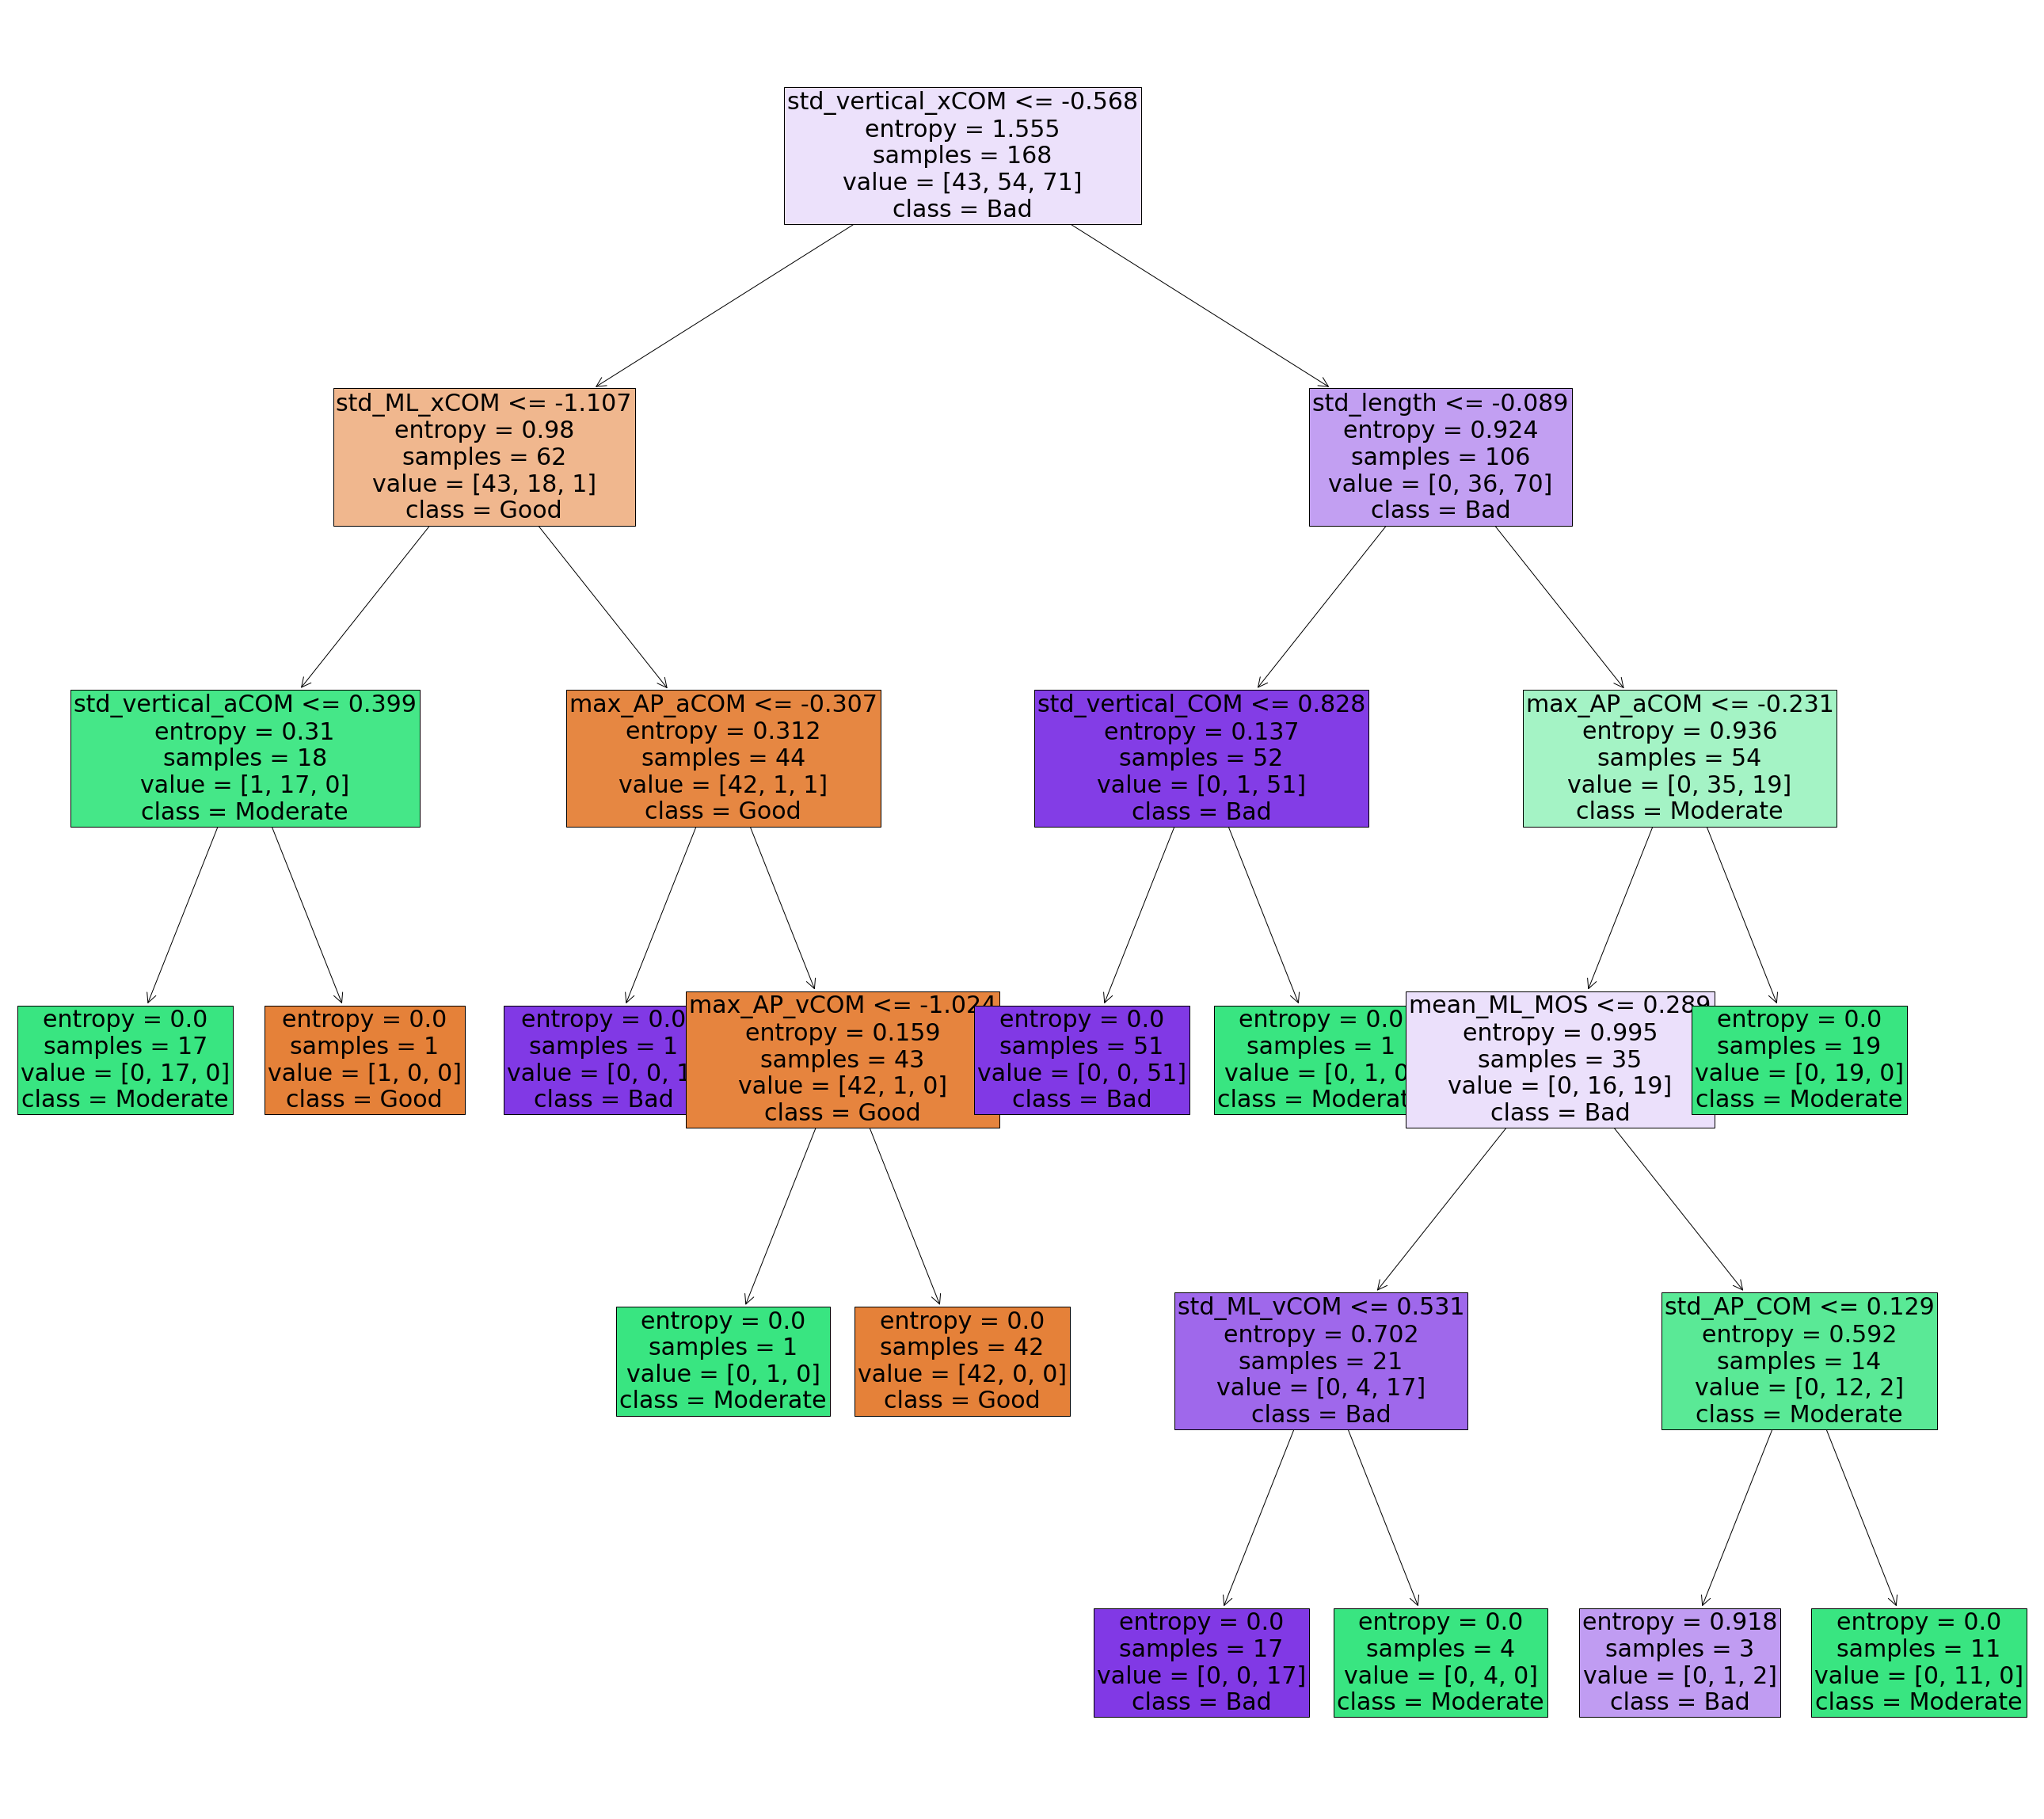

In [374]:
from sklearn import  tree
figure = plt.figure(figsize = (46,42))
tree.plot_tree(all_DT_best_reg, 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
               fontsize=30, 
              filled=True)

[Text(837.0, 1189.125, 'std_vertical_xCOM <= -0.267\ngini = 0.615\nsamples = 104\nvalue = [29, 56, 83]\nclass = Bad'),
 Text(418.5, 849.375, 'std_length <= 1.181\ngini = 0.483\nsamples = 35\nvalue = [29, 20, 0]\nclass = Good'),
 Text(209.25, 509.625, 'std_ML_xCOM <= -0.98\ngini = 0.327\nsamples = 26\nvalue = [27, 7, 0]\nclass = Good'),
 Text(104.625, 169.875, 'gini = 0.245\nsamples = 6\nvalue = [1, 6, 0]\nclass = Moderate'),
 Text(313.875, 169.875, 'gini = 0.071\nsamples = 20\nvalue = [26, 1, 0]\nclass = Good'),
 Text(627.75, 509.625, 'ROM_ML_MOS <= 0.474\ngini = 0.231\nsamples = 9\nvalue = [2, 13, 0]\nclass = Moderate'),
 Text(523.125, 169.875, 'gini = 0.0\nsamples = 7\nvalue = [0, 13, 0]\nclass = Moderate'),
 Text(732.375, 169.875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(1255.5, 849.375, 'std_length <= -0.095\ngini = 0.422\nsamples = 69\nvalue = [0, 36, 83]\nclass = Bad'),
 Text(1046.25, 509.625, 'std_vertical_xCOM <= 1.438\ngini = 0.031\nsamples = 37\nvalu

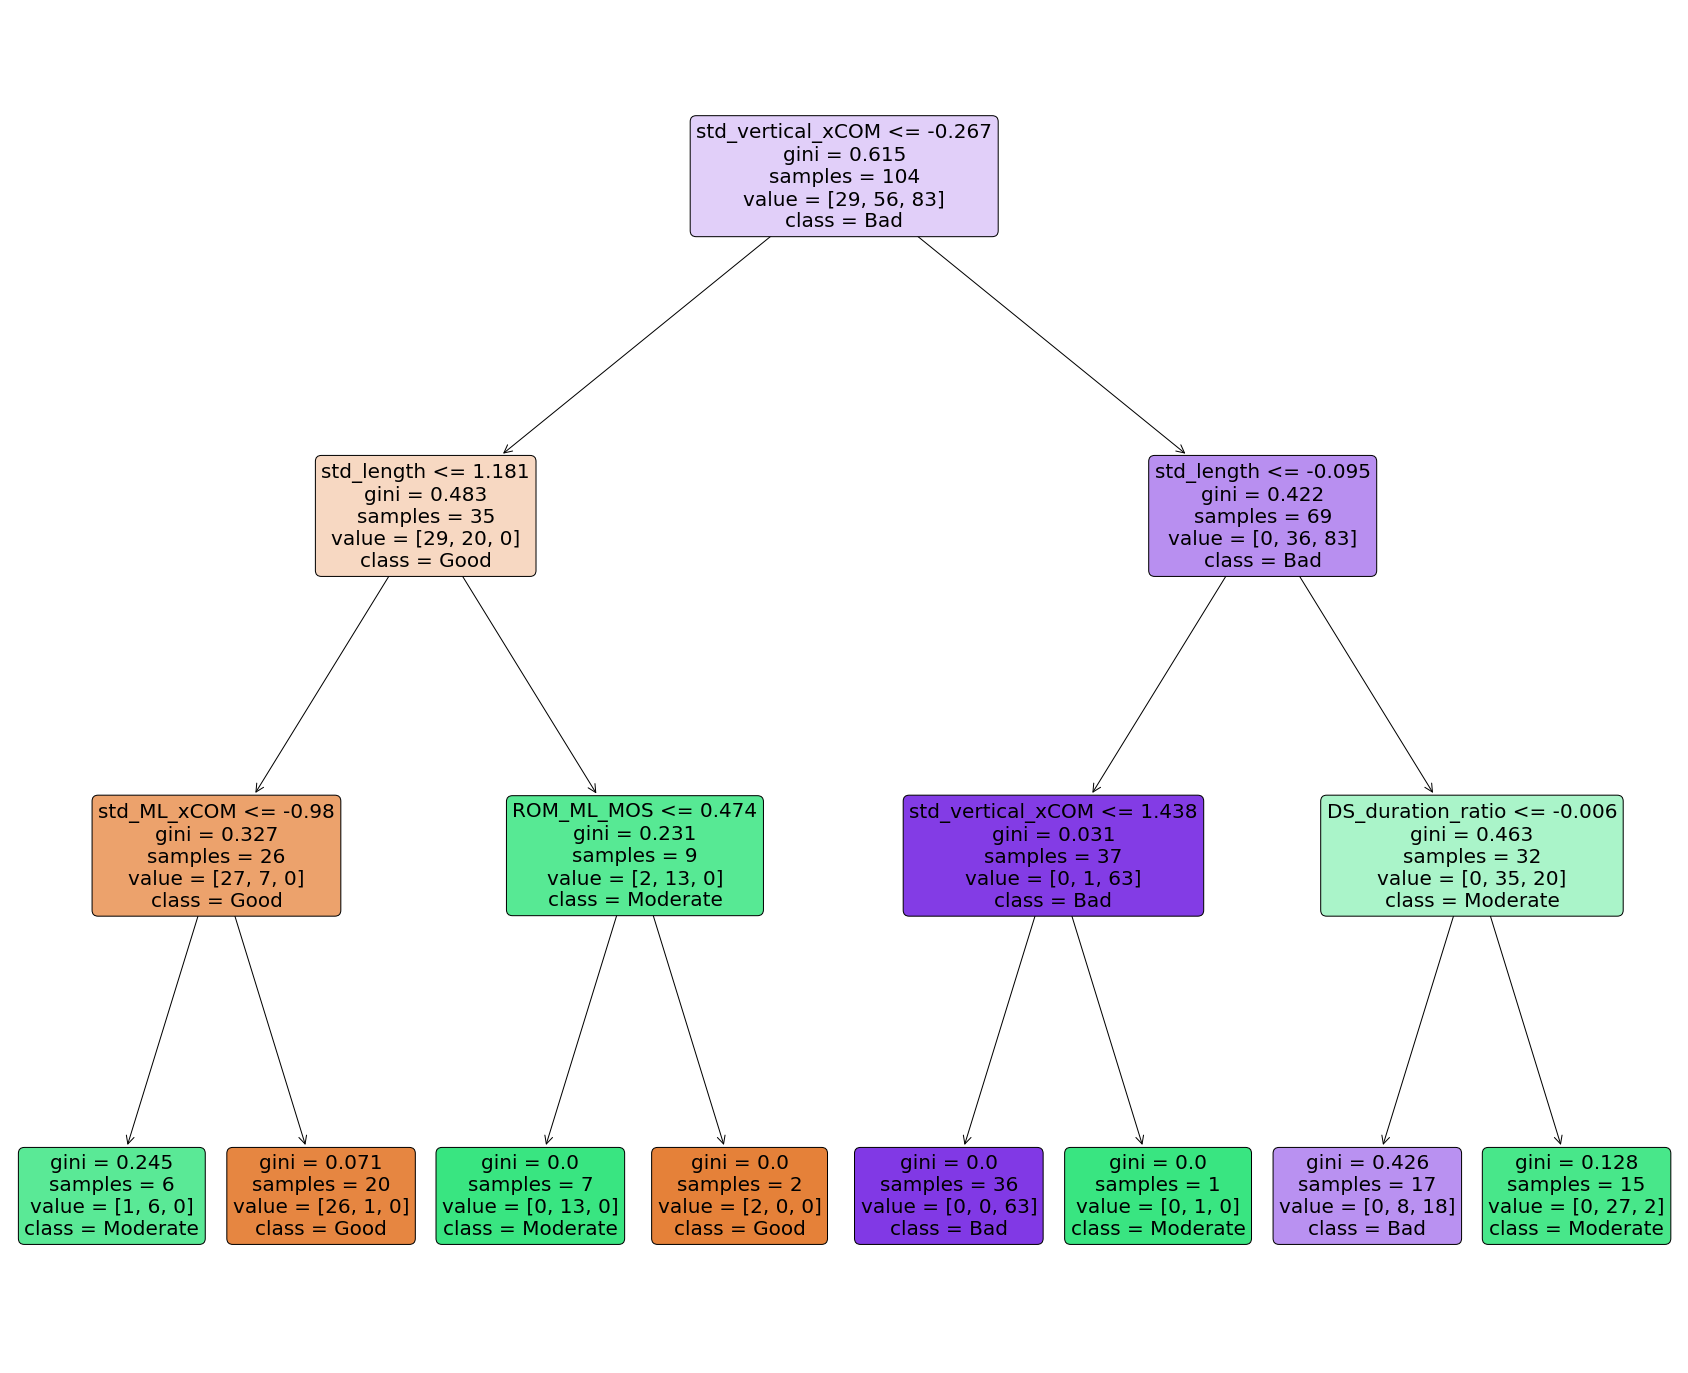

In [375]:
figure = plt.figure(figsize = (30,25))
tree.plot_tree(all_RF_best_reg.estimators_[0], 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              fontsize=20, 
              rounded=True)


In [376]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [377]:
acc_3_t = accuracy_score(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all SVC
acc: 0.904
recall: 0.884
precision: 0.909


Text(0.5, 1.0, 'SVC confusion matrix')

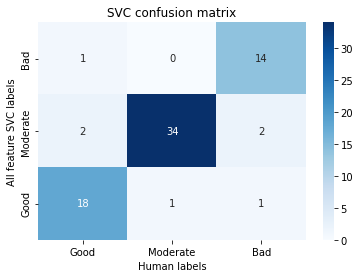

In [378]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [379]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature SVC Sensitivity: 
 Good prediction: 85.71428571428571 
 Moderate prediction 97.14285714285714 
 Bad prediction 82.35294117647058


In [380]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature SVC Precision: 
 Good prediction: 90.0 
 Moderate prediction 89.47368421052632 
 Bad prediction 93.33333333333333


In [381]:
acc_3_t = accuracy_score(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all DT
acc: 0.822
recall: 0.801
precision: 0.793


Text(0.5, 1.0, 'DT confusion matrix')

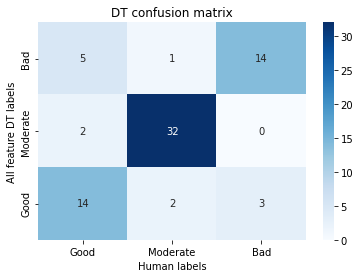

In [382]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [383]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature DT Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 91.42857142857143 
 Bad prediction 82.35294117647058


In [384]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature DT Precision: 
 Good prediction: 73.68421052631578 
 Moderate prediction 94.11764705882352 
 Bad prediction 70.0


In [385]:
acc_3_t = accuracy_score(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all RF
acc: 0.877
recall: 0.853
precision: 0.871


Text(0.5, 1.0, 'RF confusion matrix')

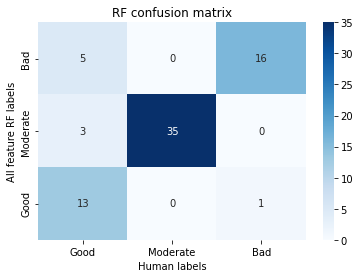

In [386]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [387]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature RF Sensitivity: 
 Good prediction: 61.904761904761905 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [388]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature RF Precision: 
 Good prediction: 92.85714285714286 
 Moderate prediction 92.10526315789474 
 Bad prediction 76.19047619047619


### spatiotemporal features

In [389]:
spa_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_SVC_grid_search.fit(spa_x_train, y_train.ravel())
spa_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [390]:
spa_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_DT_grid_search.fit(spa_x_train, y_train)
spa_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9}

In [391]:
spa_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_RF_grid_search.fit(spa_x_train, y_train)
spa_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 100}

In [392]:
spa_SVC_best_reg = spa_SVC_grid_search.best_estimator_
spa_DT_best_reg =spa_DT_grid_search.best_estimator_
spa_RF_best_reg = spa_RF_grid_search.best_estimator_

In [393]:
spa_SVC_best_reg.score(spa_x_test, y_test.ravel())

0.8356164383561644

In [394]:
spa_DT_best_reg.score(spa_x_test, y_test.ravel())

0.7671232876712328

In [395]:
spa_RF_best_reg.score(spa_x_test, y_test.ravel())

0.821917808219178

[Text(558.0, 951.3000000000001, 'max_AP_aCOM <= -0.231\ngini = 0.653\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(279.0, 679.5, 'std_length <= -0.029\ngini = 0.355\nsamples = 81\nvalue = [2, 16, 63]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'max_ML_aCOM <= 0.227\ngini = 0.042\nsamples = 47\nvalue = [1, 0, 46]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 46]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'DS_duration_ratio <= -0.37\ngini = 0.528\nsamples = 34\nvalue = [1, 16, 17]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.32\nsamples = 16\nvalue = [1, 2, 13]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.346\nsamples = 18\nvalue = [0, 14, 4]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_ML_vCOM <= -0.171\ngini = 0.579\nsamples = 87\nvalue = [41, 38, 8]\nclass = Good'),
 Text(697.5, 407.7000000000

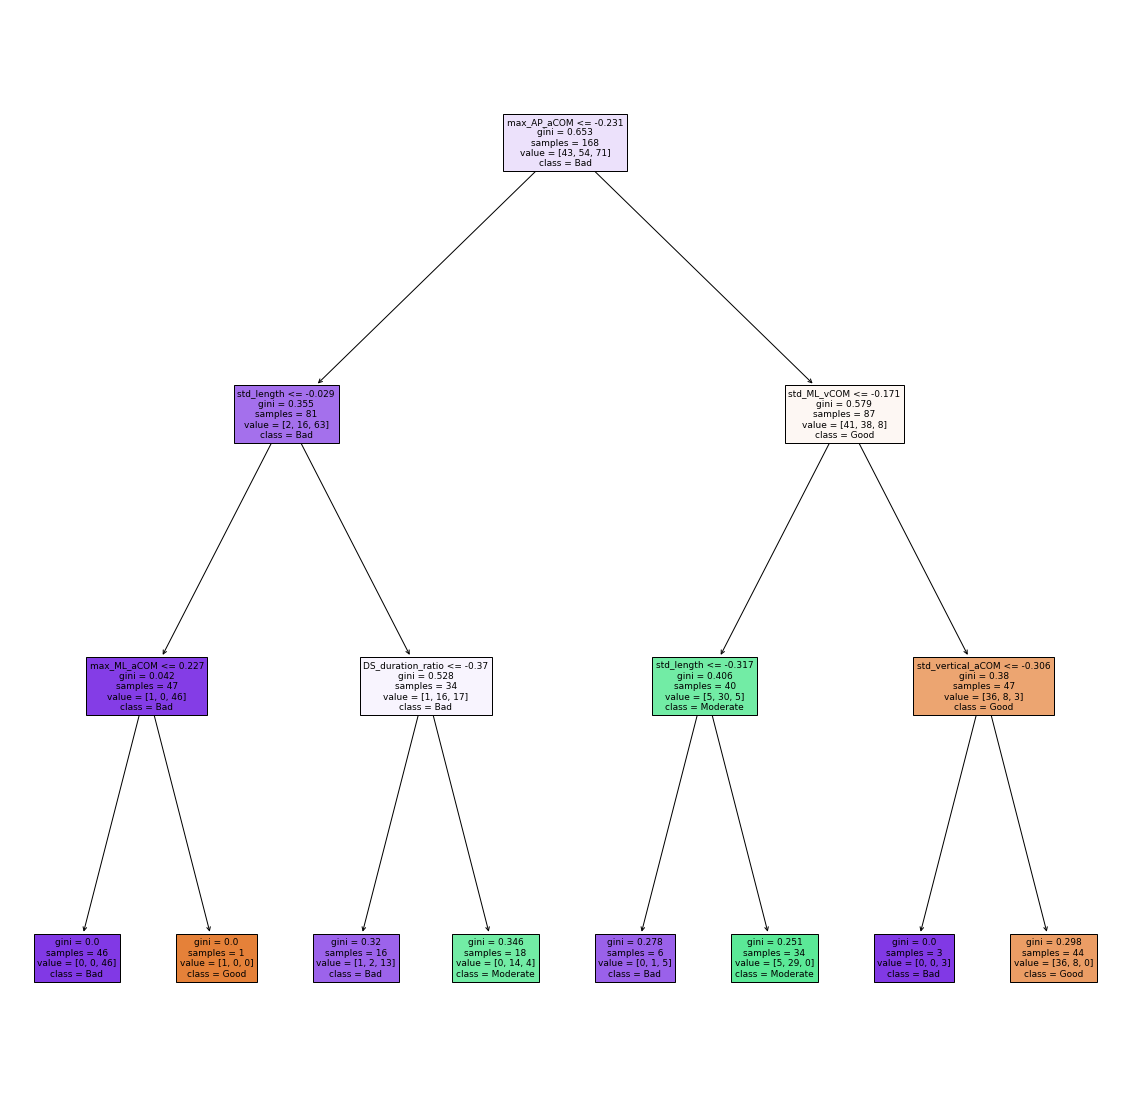

In [396]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_DT_best_reg, 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_length <= -0.017\nentropy = 1.548\nsamples = 105\nvalue = [41, 55, 72]\nclass = Bad'),
 Text(279.0, 679.5, 'std_ML_vCOM <= 0.279\nentropy = 0.991\nsamples = 45\nvalue = [25, 1, 53]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'SS_duration_ratio <= 1.26\nentropy = 0.165\nsamples = 28\nvalue = [0, 1, 40]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 39]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'std_width <= 0.594\nentropy = 0.927\nsamples = 17\nvalue = [25, 0, 13]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 12]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'entropy = 0.235\nsamples = 11\nvalue = [25, 0, 1]\nclass = Good'),
 Text(837.0, 679.5, 'std_AP_vCOM <= -0.108\nentropy = 1.358\nsamples = 60\nvalue = [16, 54, 19]\nclass = Moderate'),


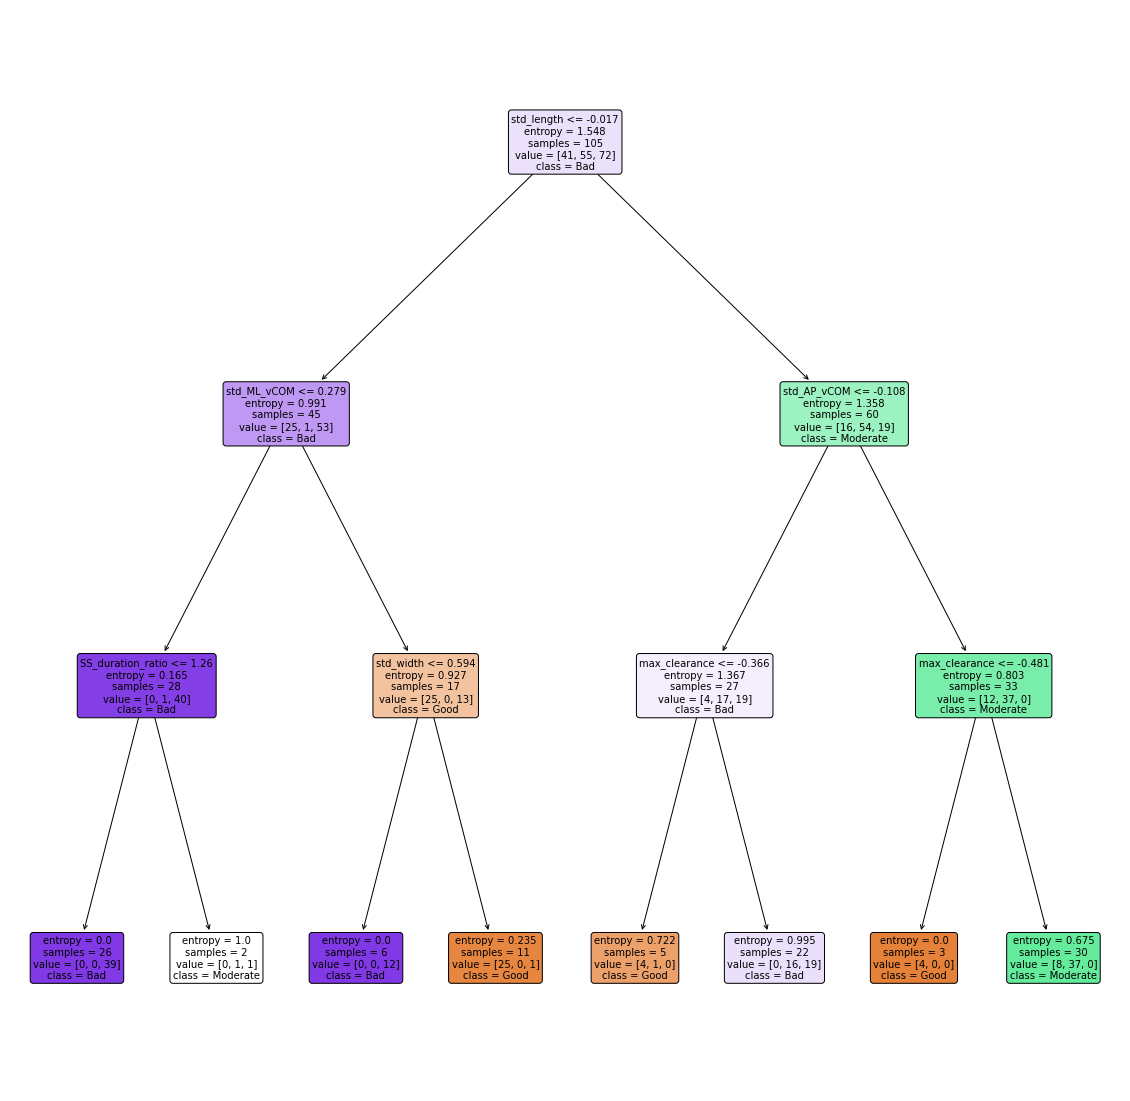

In [397]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_RF_best_reg.estimators_[0], 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [398]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [399]:
acc_3_t = accuracy_score(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal SVC" + "\n" + "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal SVC
acc: 0.836
recall: 0.804
precision: 0.813


Text(0.5, 1.0, 'SVC confusion matrix')

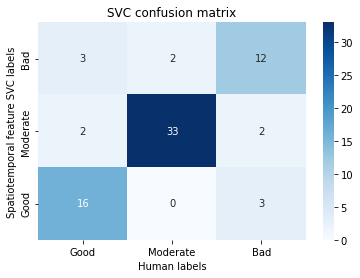

In [400]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [401]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature SVC Sensitivity: 
 Good prediction: 76.19047619047619 
 Moderate prediction 94.28571428571428 
 Bad prediction 70.58823529411765


In [402]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature SVC Precision: 
 Good prediction: 84.21052631578947 
 Moderate prediction 89.1891891891892 
 Bad prediction 70.58823529411765


In [403]:
acc_3_t = accuracy_score(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal DT
acc: 0.767
recall: 0.737
precision: 0.737


Text(0.5, 1.0, 'DT confusion matrix')

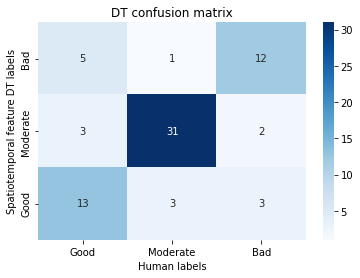

In [404]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [405]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature DT Sensitivity: 
 Good prediction: 61.904761904761905 
 Moderate prediction 88.57142857142857 
 Bad prediction 70.58823529411765


In [406]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature DT Precision: 
 Good prediction: 68.42105263157895 
 Moderate prediction 86.11111111111111 
 Bad prediction 66.66666666666666


In [407]:
acc_3_t = accuracy_score(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal RF
acc: 0.822
recall: 0.784
precision: 0.792


Text(0.5, 1.0, 'RF confusion matrix')

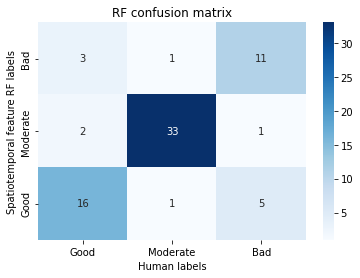

In [408]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [409]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature RF Sensitivity: 
 Good prediction: 76.19047619047619 
 Moderate prediction 94.28571428571428 
 Bad prediction 64.70588235294117


In [410]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature RF Precision: 
 Good prediction: 72.72727272727273 
 Moderate prediction 91.66666666666666 
 Bad prediction 73.33333333333333


### cop features

In [411]:
COP_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
COP_SVC_grid_search.fit(cop_x_train, y_train.ravel())
COP_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [412]:
COP_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
COP_DT_grid_search.fit(cop_x_train, y_train)
COP_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [413]:
COP_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
COP_RF_grid_search.fit(cop_x_train, y_train)
COP_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 200}

In [414]:
COP_SVC_best_reg = COP_SVC_grid_search.best_estimator_
COP_DT_best_reg = COP_DT_grid_search.best_estimator_
COP_RF_best_reg = COP_RF_grid_search.best_estimator_

In [415]:
COP_SVC_best_reg.score(cop_x_test, y_test.ravel())

0.6575342465753424

In [416]:
COP_DT_best_reg.score(cop_x_test, y_test.ravel())

0.6712328767123288

In [417]:
COP_RF_best_reg.score(cop_x_test, y_test.ravel())

0.684931506849315

[Text(604.5, 978.48, 'std_AP_aCOP <= -0.184\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(372.0, 761.0400000000001, 'std_AP_vCOP <= -0.434\nentropy = 1.252\nsamples = 96\nvalue = [8, 29, 59]\nclass = Bad'),
 Text(186.0, 543.6, 'std_ML_aCOP <= -0.439\nentropy = 1.531\nsamples = 28\nvalue = [6, 12, 10]\nclass = Moderate'),
 Text(93.0, 326.1600000000001, 'entropy = 1.55\nsamples = 23\nvalue = [6, 7, 10]\nclass = Bad'),
 Text(279.0, 326.1600000000001, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = Moderate'),
 Text(558.0, 543.6, 'std_ML_COP <= 1.197\nentropy = 0.99\nsamples = 68\nvalue = [2, 17, 49]\nclass = Bad'),
 Text(465.0, 326.1600000000001, 'max_ML_vCOP <= -0.396\nentropy = 0.843\nsamples = 59\nvalue = [0, 16, 43]\nclass = Bad'),
 Text(372.0, 108.72000000000003, 'entropy = 0.989\nsamples = 32\nvalue = [0, 14, 18]\nclass = Bad'),
 Text(558.0, 108.72000000000003, 'entropy = 0.381\nsamples = 27\nvalue = [0, 2, 25]\nclass = Bad'),
 Text(651.0, 326.1

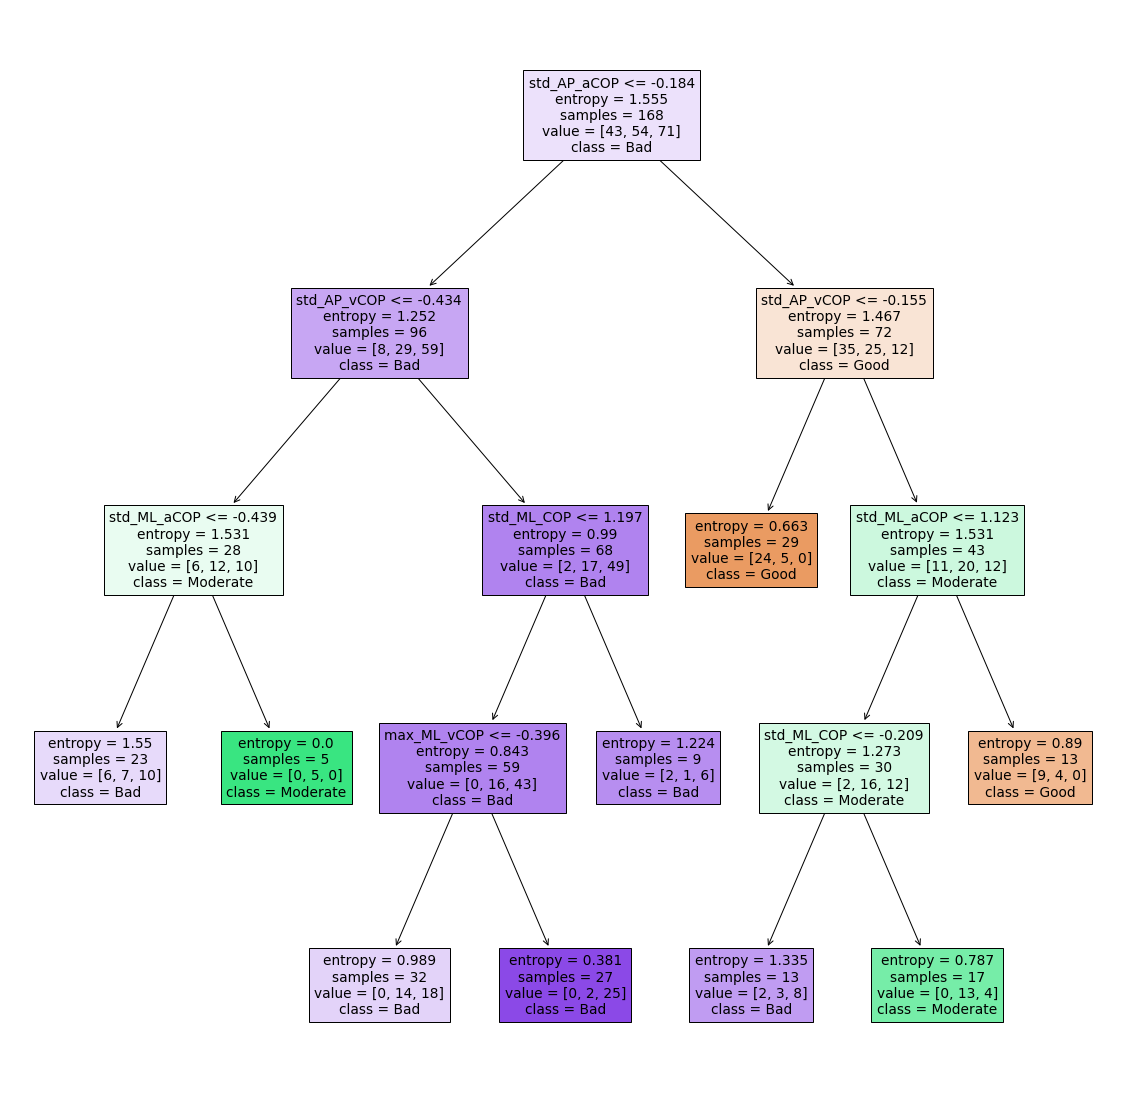

In [418]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_DT_best_reg, 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_vCOP <= -0.276\ngini = 0.633\nsamples = 104\nvalue = [46, 41, 81]\nclass = Bad'),
 Text(279.0, 679.5, 'max_AP_vCOP <= -0.185\ngini = 0.47\nsamples = 45\nvalue = [9, 13, 50]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_COP <= -1.015\ngini = 0.367\nsamples = 38\nvalue = [3, 11, 48]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.595\nsamples = 12\nvalue = [2, 7, 8]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.201\nsamples = 26\nvalue = [1, 4, 40]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_ML_COP <= -0.6\ngini = 0.56\nsamples = 7\nvalue = [6, 2, 2]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [5, 0, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.64\nsamples = 5\nvalue = [1, 2, 2]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_aCOP <= -0.155\ngini = 0.662\nsamples = 59\nvalue = [37, 28, 31]\nclass = Good'),
 Text(697.5, 407.70000000000005, 'std

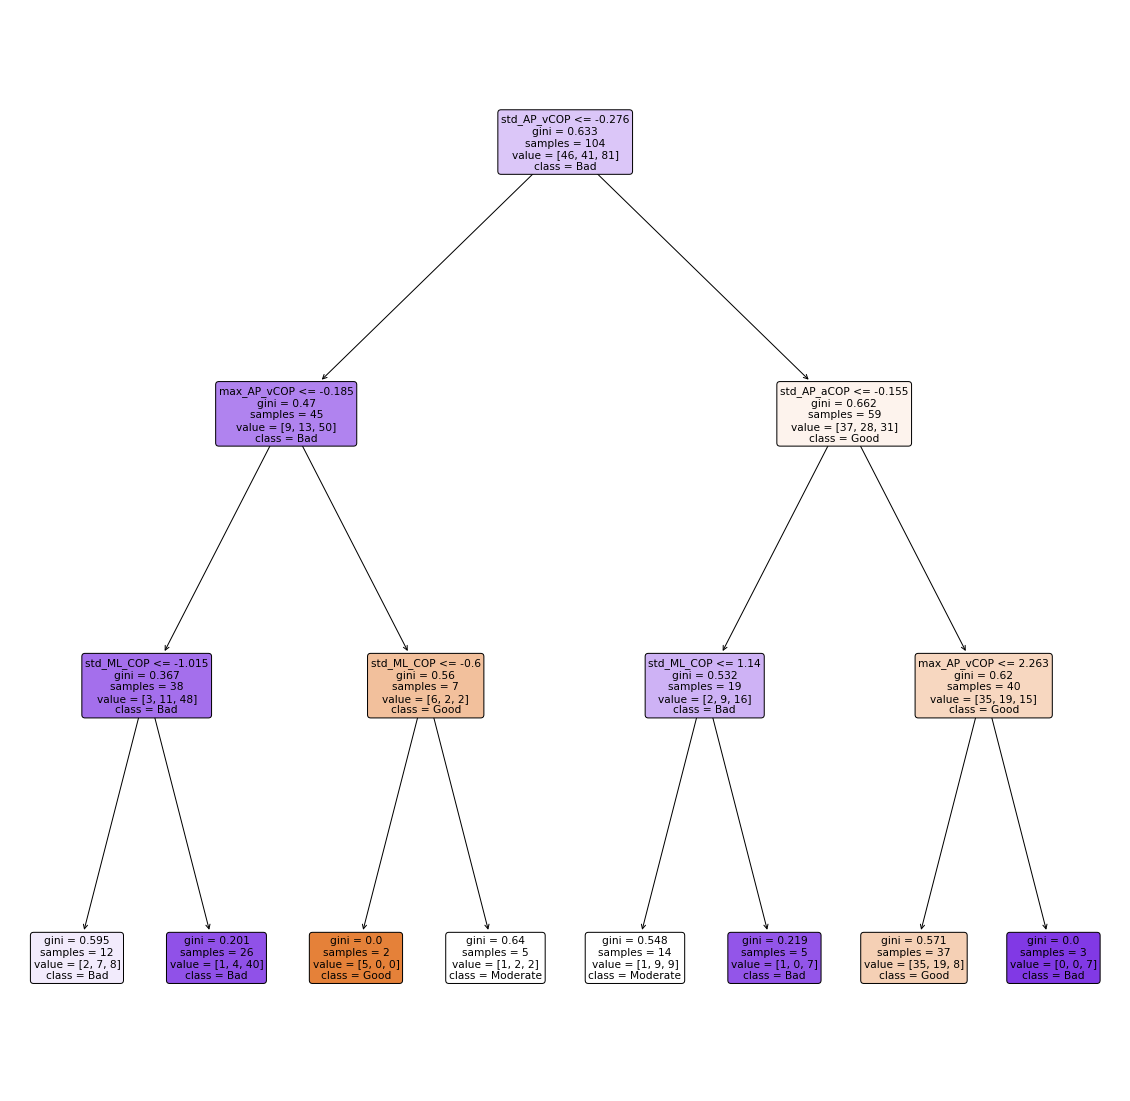

In [419]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_RF_best_reg.estimators_[0], 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [420]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [421]:
acc_3_t = accuracy_score(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates SVC
acc: 0.658
recall: 0.589
precision: 0.633


Text(0.5, 1.0, 'SVC confusion matrix')

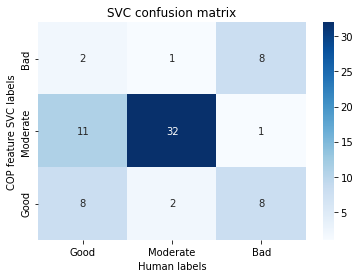

In [422]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [423]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature SVC Sensitivity: 
 Good prediction: 38.095238095238095 
 Moderate prediction 91.42857142857143 
 Bad prediction 47.05882352941176


In [424]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature SVC Precision: 
 Good prediction: 44.44444444444444 
 Moderate prediction 72.72727272727273 
 Bad prediction 72.72727272727273


In [425]:
acc_3_t = accuracy_score(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates DT
acc: 0.671
recall: 0.632
precision: 0.635


Text(0.5, 1.0, 'DT confusion matrix')

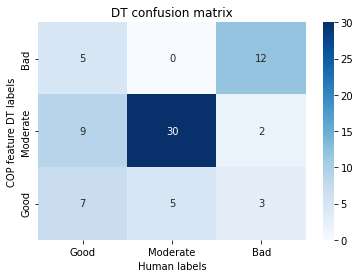

In [426]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [427]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature DT Sensitivity: 
 Good prediction: 33.33333333333333 
 Moderate prediction 85.71428571428571 
 Bad prediction 70.58823529411765


In [428]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature DT Precision: 
 Good prediction: 46.666666666666664 
 Moderate prediction 73.17073170731707 
 Bad prediction 70.58823529411765


In [429]:
acc_3_t = accuracy_score(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates RF
acc: 0.685
recall: 0.661
precision: 0.664


Text(0.5, 1.0, 'RF confusion matrix')

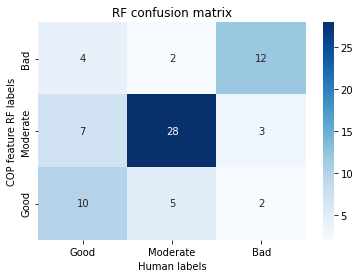

In [430]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [431]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature RF Sensitivity: 
 Good prediction: 47.61904761904761 
 Moderate prediction 80.0 
 Bad prediction 70.58823529411765


In [432]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature RF Precision: 
 Good prediction: 58.82352941176471 
 Moderate prediction 73.68421052631578 
 Bad prediction 66.66666666666666


### advanced features

In [433]:
adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
adv_SVC_grid_search.fit(adv_x_train, y_train.ravel())
adv_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [434]:
adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
adv_DT_grid_search.fit(adv_x_train, y_train)
adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [435]:
adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
adv_RF_grid_search.fit(adv_x_train, y_train)
adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 300}

In [436]:
adv_SVC_best_reg = adv_SVC_grid_search.best_estimator_
adv_DT_best_reg = adv_DT_grid_search.best_estimator_
adv_RF_best_reg = adv_RF_grid_search.best_estimator_

In [437]:
adv_SVC_best_reg.score(adv_x_test, y_test.ravel())

0.8356164383561644

In [438]:
adv_DT_best_reg.score(adv_x_test, y_test.ravel())

0.7397260273972602

In [439]:
adv_RF_best_reg.score(adv_x_test, y_test.ravel())

0.863013698630137

[Text(378.6428571428571, 978.48, 'std_vertical_xCOM <= -0.568\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(159.42857142857142, 761.0400000000001, 'std_ML_xCOM <= -1.107\nentropy = 0.98\nsamples = 62\nvalue = [43, 18, 1]\nclass = Good'),
 Text(79.71428571428571, 543.6, 'entropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(239.1428571428571, 543.6, 'entropy = 0.312\nsamples = 44\nvalue = [42, 1, 1]\nclass = Good'),
 Text(597.8571428571428, 761.0400000000001, 'max_ML_MOS <= -0.151\nentropy = 0.924\nsamples = 106\nvalue = [0, 36, 70]\nclass = Bad'),
 Text(398.57142857142856, 543.6, 'mean_ML_DS_MOS <= -1.606\nentropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]\nclass = Bad'),
 Text(318.85714285714283, 326.1600000000001, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]\nclass = Moderate'),
 Text(478.2857142857142, 326.1600000000001, 'entropy = 0.242\nsamples = 50\nvalue = [0, 2, 48]\nclass = Bad'),
 Text(797.1428571428571, 543.6, 'std_AP_IA

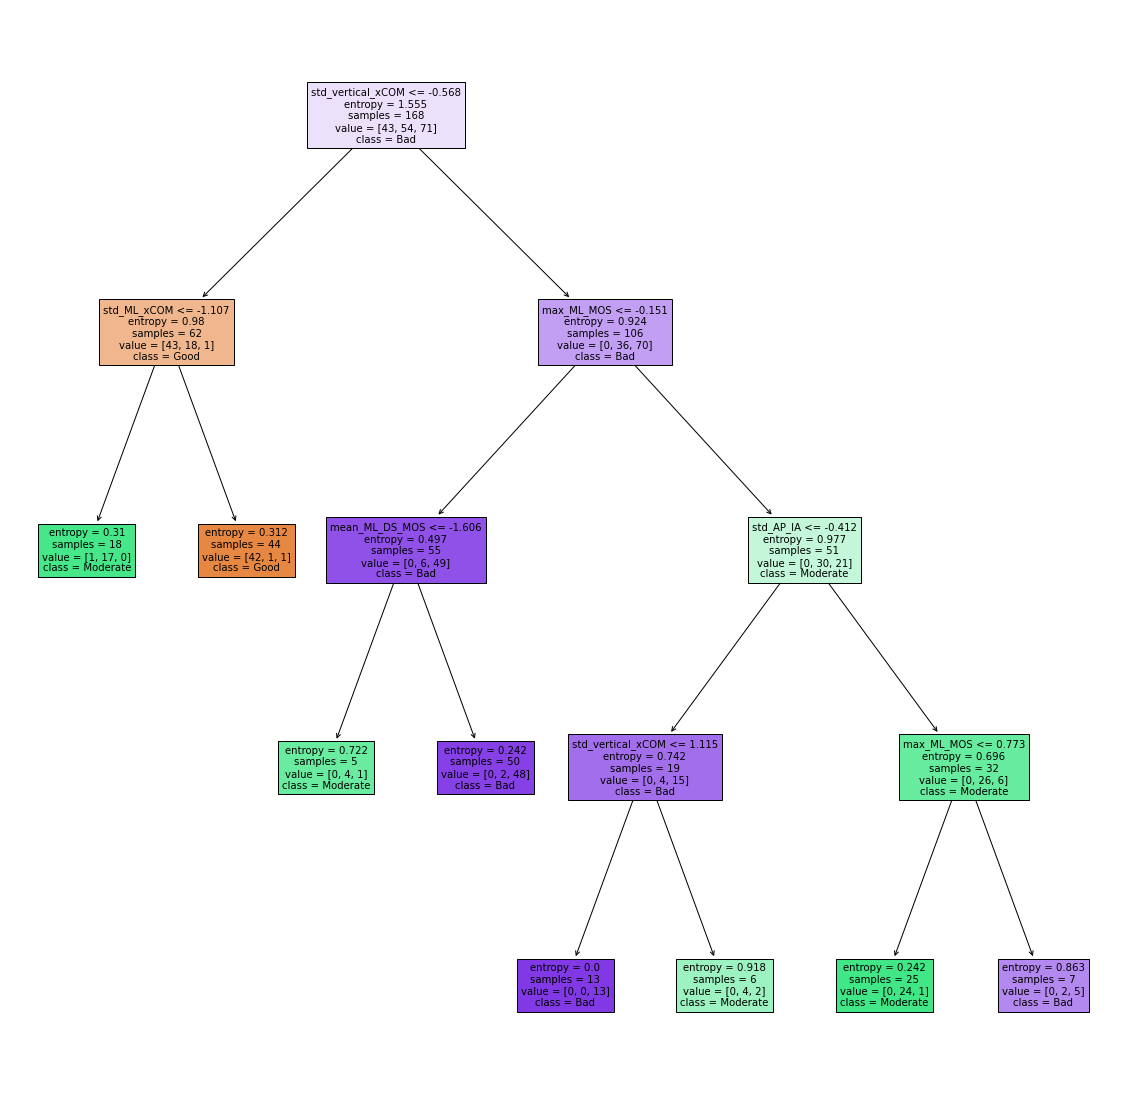

In [440]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_DT_best_reg, 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(604.5, 951.3000000000001, 'min_AP_MOS <= 0.87\ngini = 0.645\nsamples = 103\nvalue = [43, 49, 76]\nclass = Bad'),
 Text(372.0, 679.5, 'ROM_ML_MOS <= -0.941\ngini = 0.591\nsamples = 80\nvalue = [26, 34, 75]\nclass = Bad'),
 Text(186.0, 407.70000000000005, 'max_ML_MOS <= 0.323\ngini = 0.069\nsamples = 14\nvalue = [0, 1, 27]\nclass = Bad'),
 Text(93.0, 135.89999999999998, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 27]\nclass = Bad'),
 Text(279.0, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Moderate'),
 Text(558.0, 407.70000000000005, 'std_vertical_xCOM <= -0.654\ngini = 0.645\nsamples = 66\nvalue = [26, 33, 48]\nclass = Bad'),
 Text(465.0, 135.89999999999998, 'gini = 0.271\nsamples = 17\nvalue = [26, 5, 0]\nclass = Good'),
 Text(651.0, 135.89999999999998, 'gini = 0.465\nsamples = 49\nvalue = [0, 28, 48]\nclass = Bad'),
 Text(837.0, 679.5, 'std_ML_xCOM <= -1.216\ngini = 0.527\nsamples = 23\nvalue = [17, 15, 1]\nclass = Good'),
 Text(744.0, 407.7000000000000

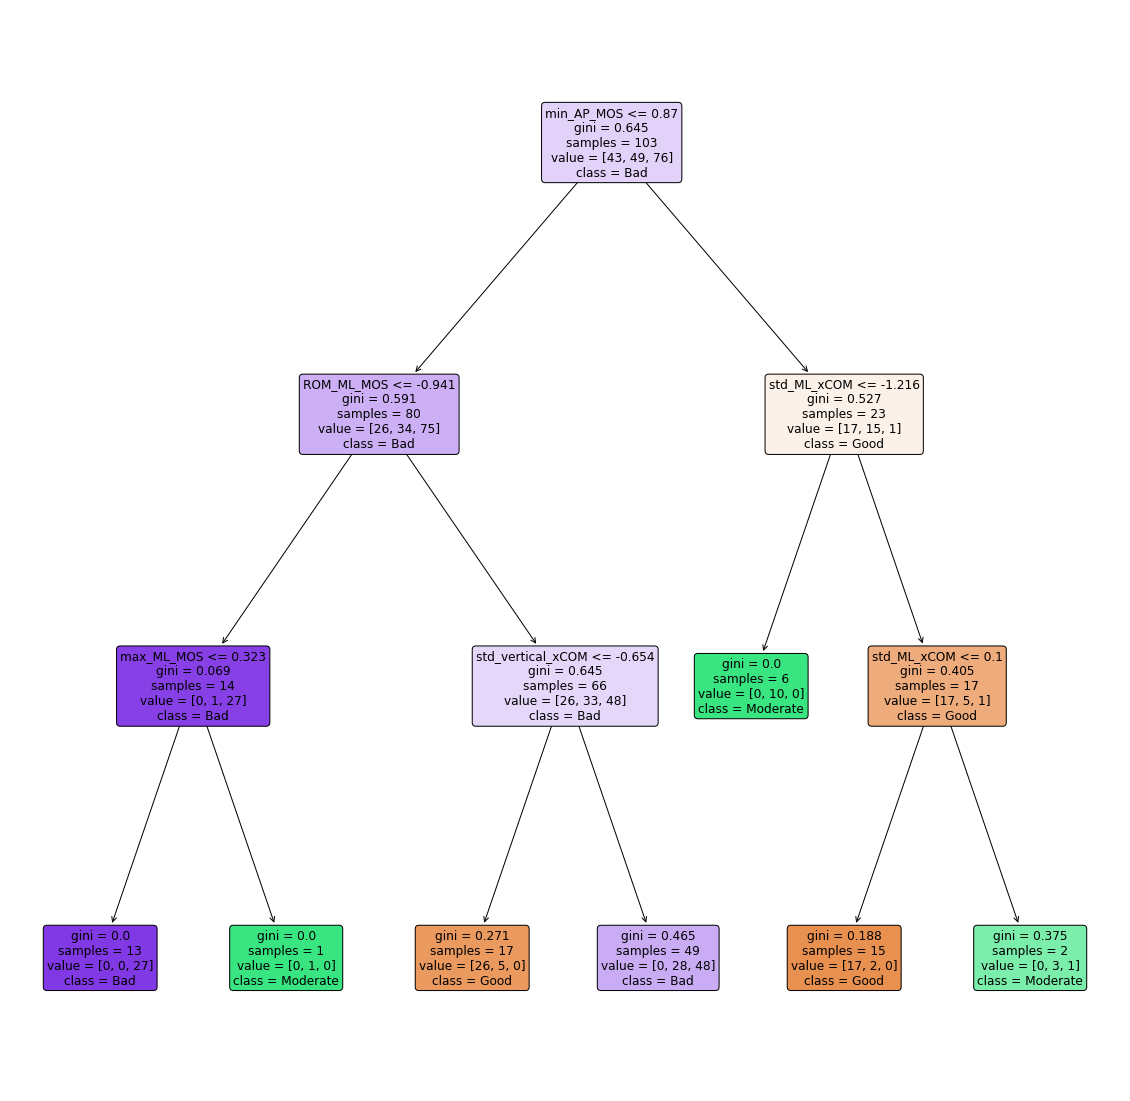

In [441]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_RF_best_reg.estimators_[0], 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [442]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [443]:
acc_3_t = accuracy_score(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced SVC
acc: 0.836
recall: 0.825
precision: 0.814


Text(0.5, 1.0, 'SVC confusion matrix')

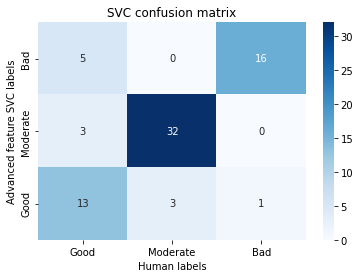

In [444]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [445]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature SVC Sensitivity: 
 Good prediction: 61.904761904761905 
 Moderate prediction 91.42857142857143 
 Bad prediction 94.11764705882352


In [446]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature SVC Precision: 
 Good prediction: 76.47058823529412 
 Moderate prediction 91.42857142857143 
 Bad prediction 76.19047619047619


In [447]:
acc_3_t = accuracy_score(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced DT
acc: 0.74
recall: 0.725
precision: 0.711


Text(0.5, 1.0, 'DT confusion matrix')

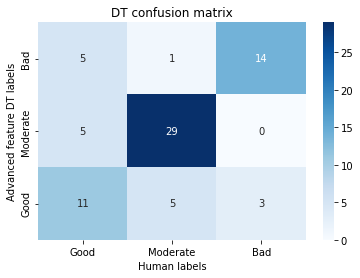

In [448]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [449]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature DT Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 82.85714285714286 
 Bad prediction 82.35294117647058


In [450]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature DT Precision: 
 Good prediction: 57.89473684210527 
 Moderate prediction 85.29411764705883 
 Bad prediction 70.0


In [451]:
acc_3_t = accuracy_score(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced RF
acc: 0.863
recall: 0.841
precision: 0.883


Text(0.5, 1.0, 'RF confusion matrix')

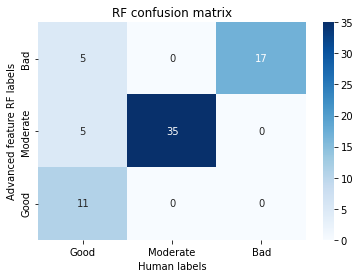

In [452]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [453]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature RF Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 100.0 
 Bad prediction 100.0


In [454]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature RF Precision: 
 Good prediction: 100.0 
 Moderate prediction 87.5 
 Bad prediction 77.27272727272727


### spa cop features

In [455]:
spa_cop_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_cop_SVC_grid_search.fit(spa_cop_x_train, y_train.ravel())
spa_cop_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [456]:
spa_cop_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_cop_DT_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10}

In [457]:
spa_cop_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_cop_RF_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 9,
 'n_estimators': 200}

In [458]:
spa_cop_SVC_best_reg = spa_cop_SVC_grid_search.best_estimator_
spa_cop_DT_best_reg = spa_cop_DT_grid_search.best_estimator_
spa_cop_RF_best_reg = spa_cop_RF_grid_search.best_estimator_

In [459]:
spa_cop_SVC_best_reg.score(spa_cop_x_test, y_test.ravel())

0.8356164383561644

In [460]:
spa_cop_DT_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7671232876712328

In [461]:
spa_cop_RF_best_reg.score(spa_cop_x_test, y_test.ravel())

0.8493150684931506

[Text(438.4285714285714, 978.48, 'max_AP_aCOM <= -0.231\ngini = 0.653\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(159.42857142857142, 761.0400000000001, 'std_length <= -0.029\ngini = 0.355\nsamples = 81\nvalue = [2, 16, 63]\nclass = Bad'),
 Text(79.71428571428571, 543.6, 'gini = 0.042\nsamples = 47\nvalue = [1, 0, 46]\nclass = Bad'),
 Text(239.1428571428571, 543.6, 'SS_duration_ratio <= 0.37\ngini = 0.528\nsamples = 34\nvalue = [1, 16, 17]\nclass = Bad'),
 Text(159.42857142857142, 326.1600000000001, 'std_AP_COM <= 0.129\ngini = 0.346\nsamples = 18\nvalue = [0, 14, 4]\nclass = Moderate'),
 Text(79.71428571428571, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Bad'),
 Text(239.1428571428571, 108.72000000000003, 'gini = 0.124\nsamples = 15\nvalue = [0, 14, 1]\nclass = Moderate'),
 Text(318.85714285714283, 326.1600000000001, 'gini = 0.32\nsamples = 16\nvalue = [1, 2, 13]\nclass = Bad'),
 Text(717.4285714285713, 761.0400000000001, 'std_ML_vCOM <= -0.

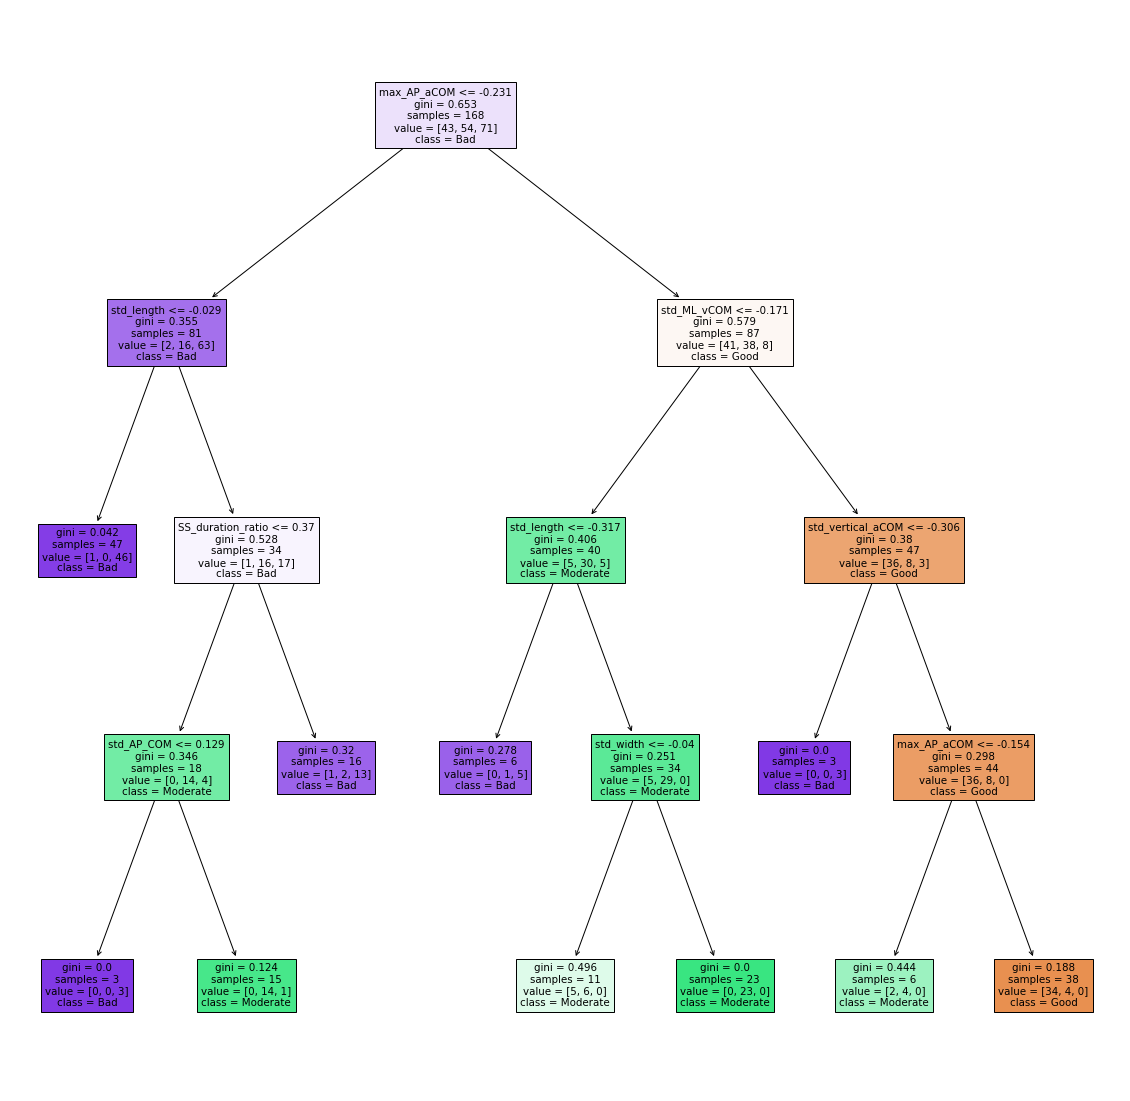

In [462]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_DT_best_reg, 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_COM <= 0.16\nentropy = 1.57\nsamples = 106\nvalue = [45, 61, 62]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_vCOM <= 0.126\nentropy = 1.297\nsamples = 51\nvalue = [23, 8, 47]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_COP <= 0.985\nentropy = 0.922\nsamples = 39\nvalue = [12, 2, 46]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.557\nsamples = 30\nvalue = [4, 1, 43]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 1.189\nsamples = 9\nvalue = [8, 1, 3]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_AP_COM <= -0.715\nentropy = 1.194\nsamples = 12\nvalue = [11, 6, 1]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [10, 0, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'entropy = 1.061\nsamples = 7\nvalue = [1, 6, 1]\nclass = Moderate'),
 Text(837.0, 679.5, 'max_ML_aCOM <= -0.354\nentropy = 1.378\nsamples = 55\nvalue = [22, 53, 15]\nclass = Moderate')

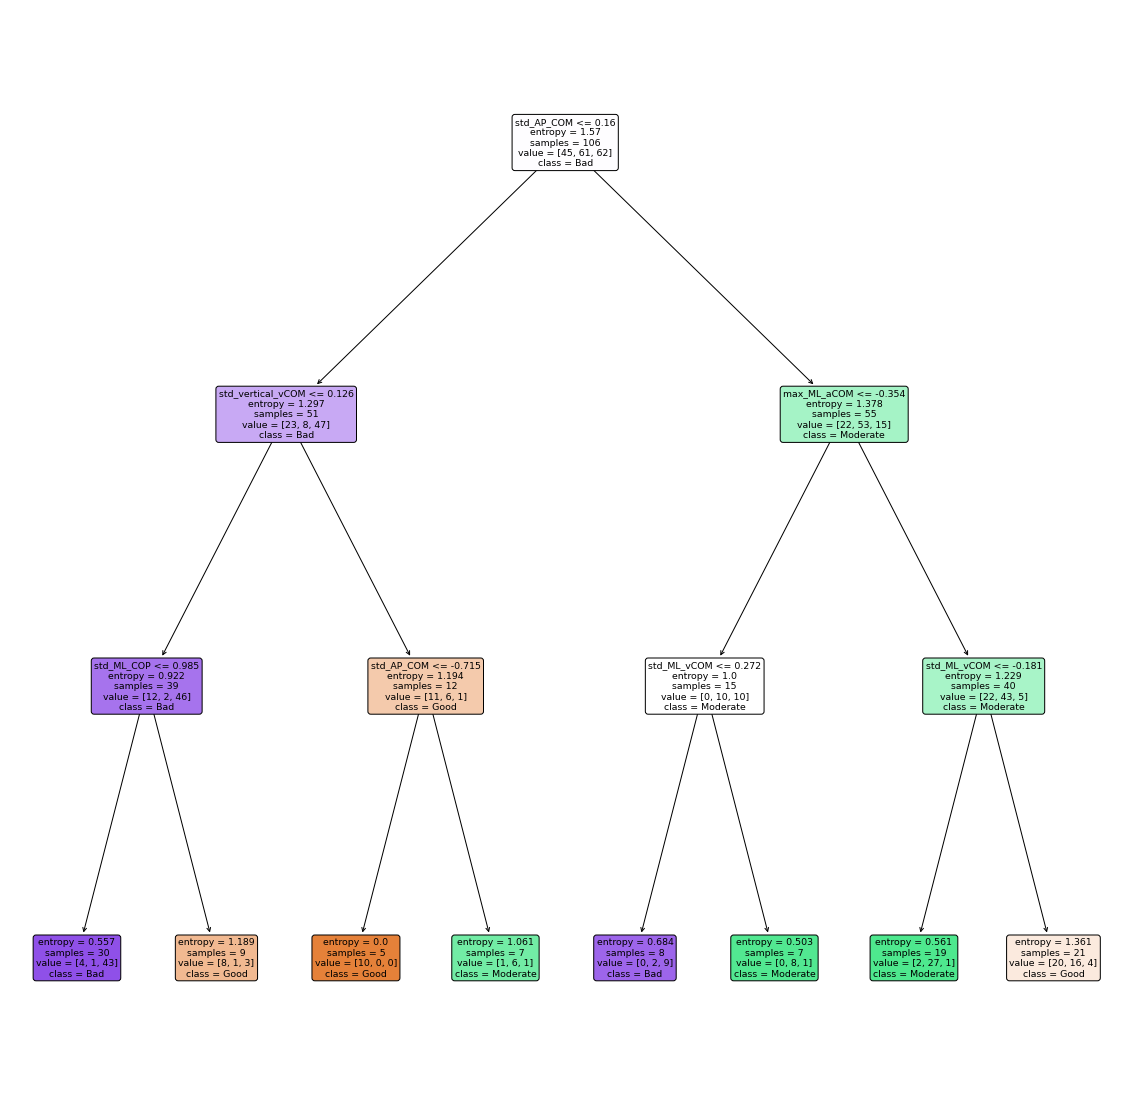

In [463]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_RF_best_reg.estimators_[0], 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [464]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [465]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop SVC
acc: 0.836
recall: 0.8
precision: 0.827


Text(0.5, 1.0, 'SVC confusion matrix')

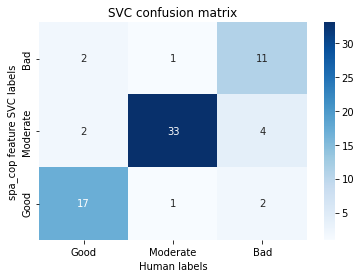

In [466]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [467]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature SVC Sensitivity: 
 Good prediction: 80.95238095238095 
 Moderate prediction 94.28571428571428 
 Bad prediction 64.70588235294117


In [468]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature SVC Precision: 
 Good prediction: 85.0 
 Moderate prediction 84.61538461538461 
 Bad prediction 78.57142857142857


In [469]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop DT
acc: 0.767
recall: 0.729
precision: 0.752


Text(0.5, 1.0, 'DT confusion matrix')

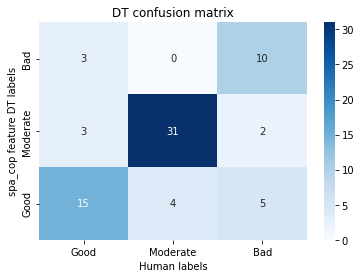

In [470]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [471]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature DT Sensitivity: 
 Good prediction: 71.42857142857143 
 Moderate prediction 88.57142857142857 
 Bad prediction 58.82352941176471


In [472]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature DT Precision: 
 Good prediction: 62.5 
 Moderate prediction 86.11111111111111 
 Bad prediction 76.92307692307693


In [473]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop RF
acc: 0.849
recall: 0.819
precision: 0.83


Text(0.5, 1.0, 'RF confusion matrix')

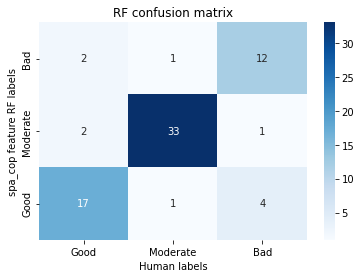

In [474]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [475]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature RF Sensitivity: 
 Good prediction: 80.95238095238095 
 Moderate prediction 94.28571428571428 
 Bad prediction 70.58823529411765


In [476]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature RF Precision: 
 Good prediction: 77.27272727272727 
 Moderate prediction 91.66666666666666 
 Bad prediction 80.0


### spa adv features

In [477]:
spa_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_adv_SVC_grid_search.fit(spa_adv_x_train, y_train.ravel())
spa_adv_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [478]:
spa_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_adv_DT_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9}

In [479]:
spa_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_adv_RF_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 100}

In [480]:
spa_adv_SVC_best_reg = spa_adv_SVC_grid_search.best_estimator_
spa_adv_DT_best_reg = spa_adv_DT_grid_search.best_estimator_
spa_adv_RF_best_reg = spa_adv_RF_grid_search.best_estimator_

In [481]:
spa_adv_SVC_best_reg.score(spa_adv_x_test, y_test.ravel())

0.9178082191780822

In [482]:
spa_adv_DT_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8356164383561644

In [483]:
spa_adv_RF_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8904109589041096

[Text(438.4285714285714, 978.48, 'std_vertical_xCOM <= -0.568\ngini = 0.653\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(159.42857142857142, 761.0400000000001, 'std_ML_xCOM <= -1.107\ngini = 0.434\nsamples = 62\nvalue = [43, 18, 1]\nclass = Good'),
 Text(79.71428571428571, 543.6, 'gini = 0.105\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(239.1428571428571, 543.6, 'max_AP_aCOM <= -0.307\ngini = 0.088\nsamples = 44\nvalue = [42, 1, 1]\nclass = Good'),
 Text(159.42857142857142, 326.1600000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Bad'),
 Text(318.85714285714283, 326.1600000000001, 'gini = 0.045\nsamples = 43\nvalue = [42, 1, 0]\nclass = Good'),
 Text(717.4285714285713, 761.0400000000001, 'std_vertical_vCOM <= 0.123\ngini = 0.449\nsamples = 106\nvalue = [0, 36, 70]\nclass = Bad'),
 Text(558.0, 543.6, 'std_length <= 0.209\ngini = 0.18\nsamples = 70\nvalue = [0, 7, 63]\nclass = Bad'),
 Text(478.2857142857142, 326.1600000000001, 'gini = 0.0\nsa

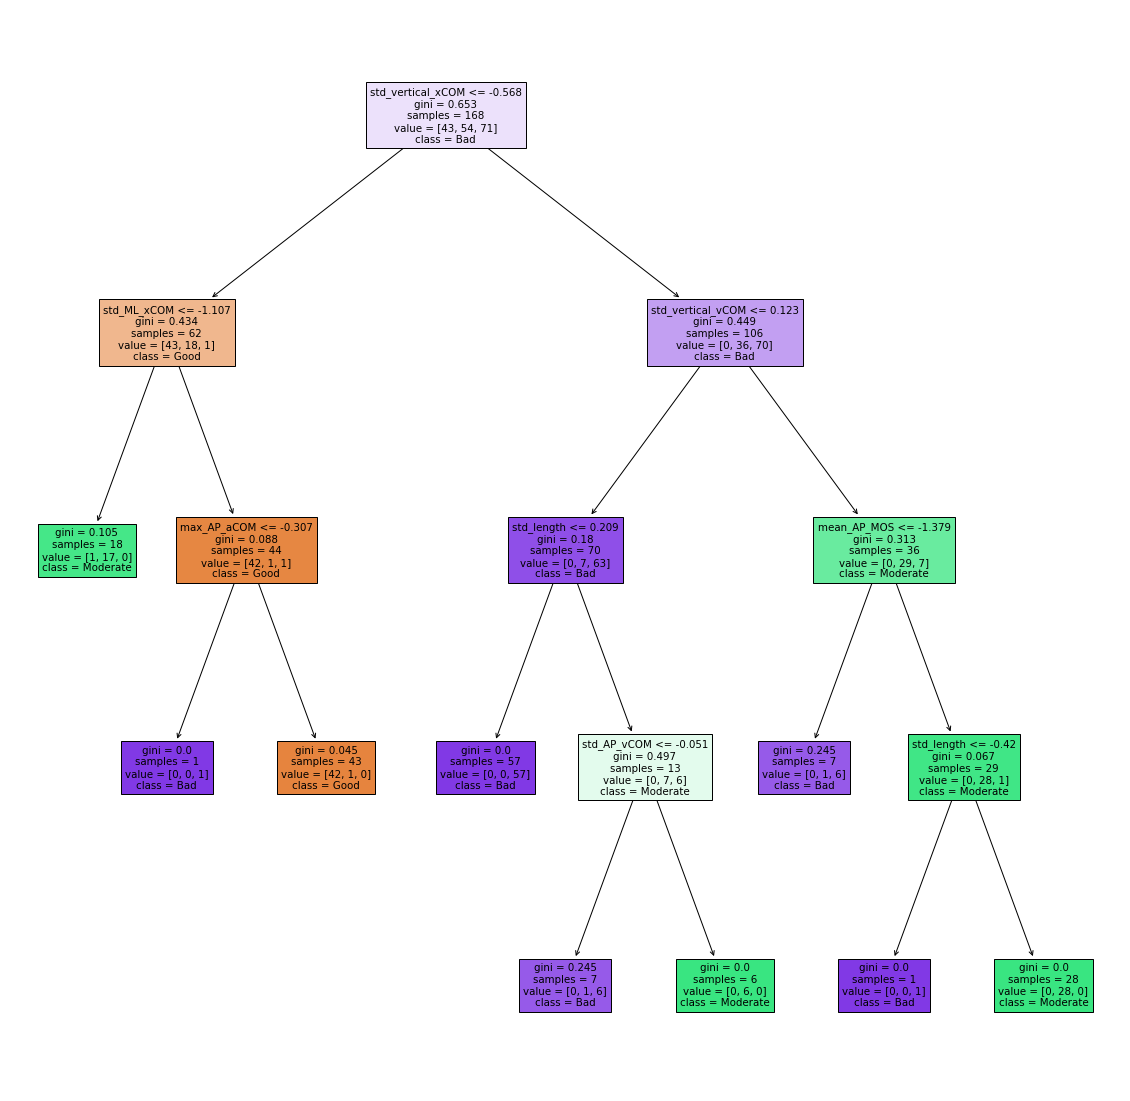

In [484]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_DT_best_reg, 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_ML_xCOM <= -0.415\ngini = 0.657\nsamples = 104\nvalue = [53, 46, 69]\nclass = Bad'),
 Text(279.0, 679.5, 'max_ML_aCOM <= -0.11\ngini = 0.494\nsamples = 48\nvalue = [51, 21, 6]\nclass = Good'),
 Text(139.5, 407.70000000000005, 'std_ML_IA <= 0.301\ngini = 0.645\nsamples = 11\nvalue = [5, 9, 6]\nclass = Moderate'),
 Text(69.75, 135.89999999999998, 'gini = 0.48\nsamples = 8\nvalue = [0, 9, 6]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [5, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_AP_MOS <= 0.606\ngini = 0.328\nsamples = 37\nvalue = [46, 12, 0]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'gini = 0.408\nsamples = 28\nvalue = [30, 12, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 9\nvalue = [16, 0, 0]\nclass = Good'),
 Text(837.0, 679.5, 'max_ML_aCOM <= -0.19\ngini = 0.432\nsamples = 56\nvalue = [2, 25, 63]\nclass = Bad'),
 Text(697.5, 407.70000000000005,

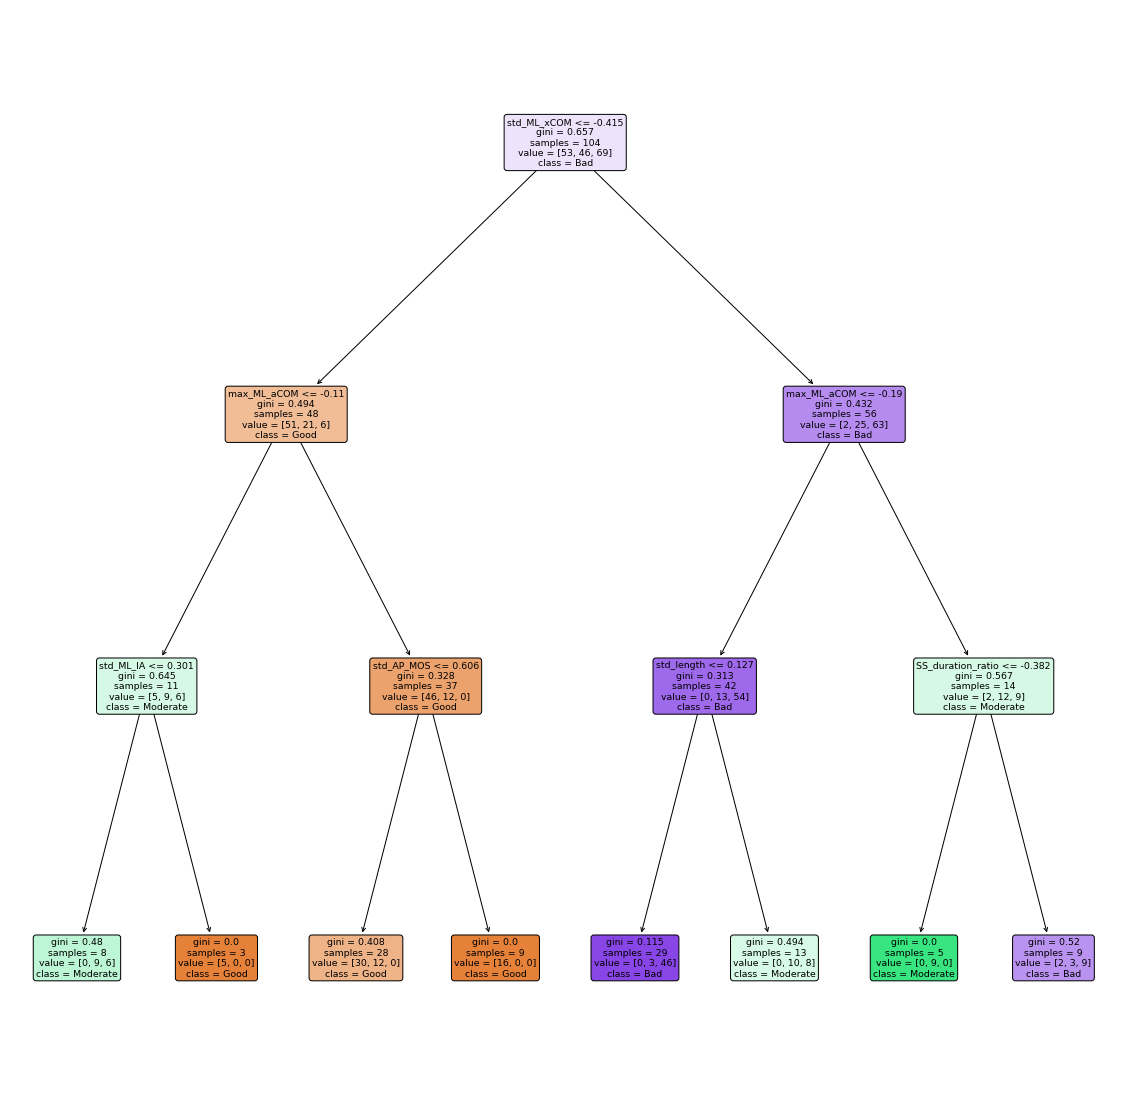

In [485]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_RF_best_reg.estimators_[0], 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [486]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [487]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv SVC
acc: 0.918
recall: 0.901
precision: 0.917


Text(0.5, 1.0, 'SVC confusion matrix')

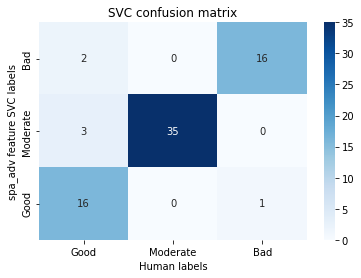

In [488]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [489]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature SVC Sensitivity: 
 Good prediction: 76.19047619047619 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [490]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature SVC Precision: 
 Good prediction: 94.11764705882352 
 Moderate prediction 92.10526315789474 
 Bad prediction 88.88888888888889


In [491]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv DT
acc: 0.836
recall: 0.817
precision: 0.807


Text(0.5, 1.0, 'DT confusion matrix')

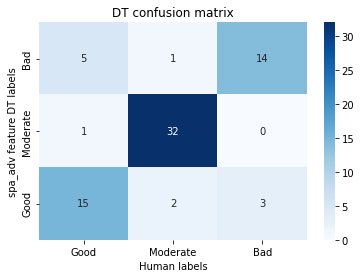

In [492]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [493]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature DT Sensitivity: 
 Good prediction: 71.42857142857143 
 Moderate prediction 91.42857142857143 
 Bad prediction 82.35294117647058


In [494]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature DT Precision: 
 Good prediction: 75.0 
 Moderate prediction 96.96969696969697 
 Bad prediction 70.0


In [495]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv RF
acc: 0.89
recall: 0.869
precision: 0.88


Text(0.5, 1.0, 'RF confusion matrix')

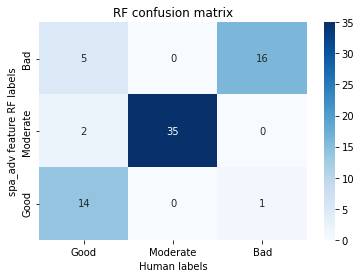

In [496]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [497]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature RF Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [498]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature RF Precision: 
 Good prediction: 93.33333333333333 
 Moderate prediction 94.5945945945946 
 Bad prediction 76.19047619047619


### cop adv features

In [499]:
cop_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
cop_adv_SVC_grid_search.fit(cop_adv_x_train, y_train.ravel())
cop_adv_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [500]:
cop_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
cop_adv_DT_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [501]:
cop_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
cop_adv_RF_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 300}

In [502]:
cop_adv_SVC_best_reg = cop_adv_SVC_grid_search.best_estimator_
cop_adv_DT_best_reg = cop_adv_DT_grid_search.best_estimator_
cop_adv_RF_best_reg = cop_adv_RF_grid_search.best_estimator_

In [503]:
cop_adv_SVC_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7671232876712328

In [504]:
cop_adv_DT_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7397260273972602

In [505]:
cop_adv_RF_best_reg.score(cop_adv_x_test, y_test.ravel())

0.8082191780821918

[Text(378.6428571428571, 978.48, 'std_vertical_xCOM <= -0.568\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(159.42857142857142, 761.0400000000001, 'std_ML_xCOM <= -1.107\nentropy = 0.98\nsamples = 62\nvalue = [43, 18, 1]\nclass = Good'),
 Text(79.71428571428571, 543.6, 'entropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(239.1428571428571, 543.6, 'entropy = 0.312\nsamples = 44\nvalue = [42, 1, 1]\nclass = Good'),
 Text(597.8571428571428, 761.0400000000001, 'max_ML_MOS <= -0.151\nentropy = 0.924\nsamples = 106\nvalue = [0, 36, 70]\nclass = Bad'),
 Text(398.57142857142856, 543.6, 'mean_ML_DS_MOS <= -1.606\nentropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]\nclass = Bad'),
 Text(318.85714285714283, 326.1600000000001, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]\nclass = Moderate'),
 Text(478.2857142857142, 326.1600000000001, 'entropy = 0.242\nsamples = 50\nvalue = [0, 2, 48]\nclass = Bad'),
 Text(797.1428571428571, 543.6, 'std_AP_IA

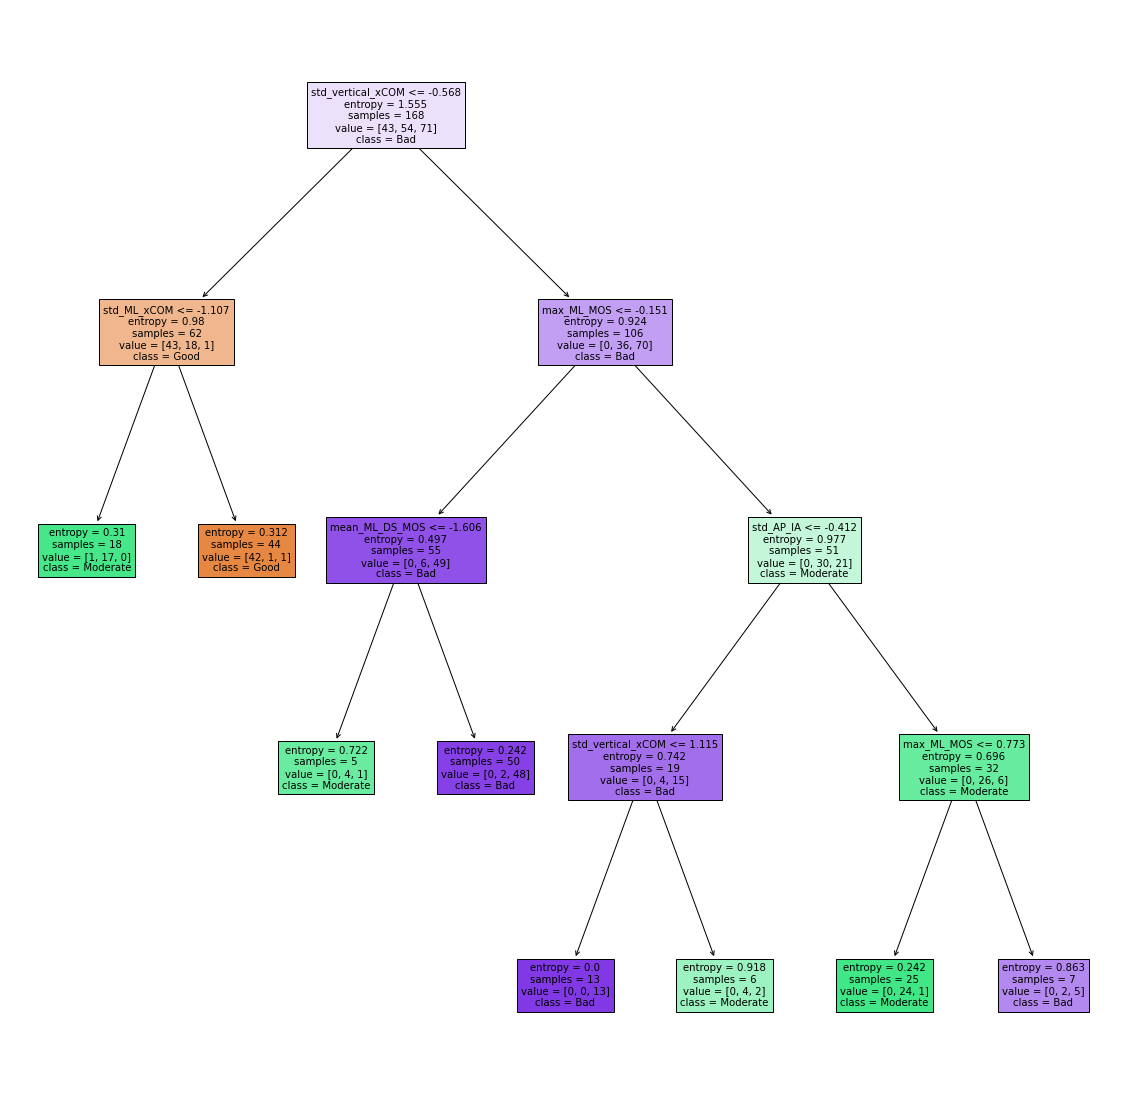

In [506]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_DT_best_reg, 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(472.15384615384613, 951.3000000000001, 'ROM_ML_MOS <= -0.772\ngini = 0.644\nsamples = 110\nvalue = [36, 61, 71]\nclass = Bad'),
 Text(171.69230769230768, 679.5, 'mean_ML_MOS <= -1.405\ngini = 0.193\nsamples = 22\nvalue = [3, 1, 34]\nclass = Bad'),
 Text(85.84615384615384, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(257.53846153846155, 407.70000000000005, 'std_ML_IA <= 0.332\ngini = 0.106\nsamples = 20\nvalue = [1, 1, 34]\nclass = Bad'),
 Text(171.69230769230768, 135.89999999999998, 'gini = 0.057\nsamples = 18\nvalue = [0, 1, 33]\nclass = Bad'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]\nclass = Good'),
 Text(772.6153846153845, 679.5, 'min_AP_MOS <= -0.346\ngini = 0.642\nsamples = 88\nvalue = [33, 60, 37]\nclass = Moderate'),
 Text(600.9230769230769, 407.70000000000005, 'std_AP_vCOP <= 0.039\ngini = 0.498\nsamples = 32\nvalue = [0, 24, 27]\nclass = Bad'),
 Text(515.0769230769231, 135.8999999

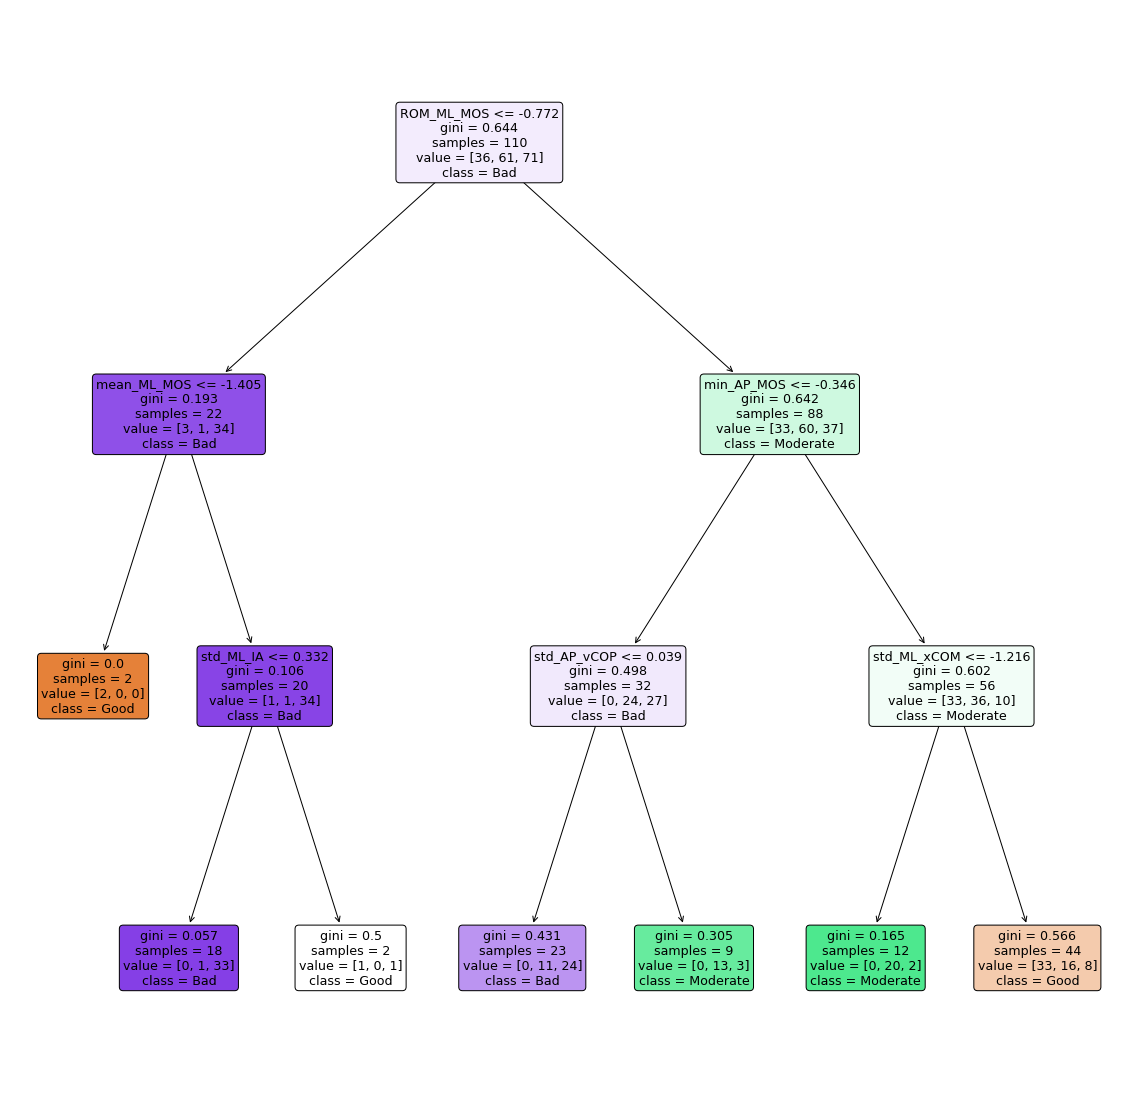

In [507]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_RF_best_reg.estimators_[0], 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [508]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [509]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv SVC
acc: 0.767
recall: 0.744
precision: 0.73


Text(0.5, 1.0, 'SVC confusion matrix')

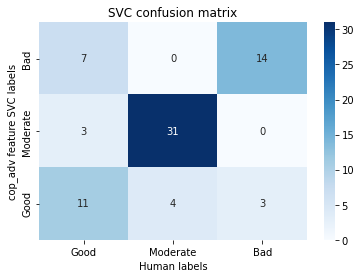

In [510]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [511]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature SVC Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 88.57142857142857 
 Bad prediction 82.35294117647058


In [512]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature SVC Precision: 
 Good prediction: 61.111111111111114 
 Moderate prediction 91.17647058823529 
 Bad prediction 66.66666666666666


In [513]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv DT
acc: 0.74
recall: 0.725
precision: 0.711


Text(0.5, 1.0, 'DT confusion matrix')

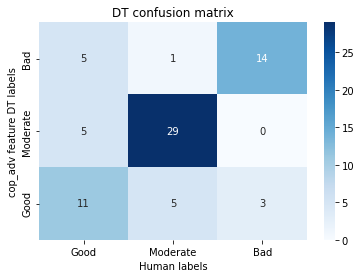

In [514]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [515]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature DT Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 82.85714285714286 
 Bad prediction 82.35294117647058


In [516]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature DT Precision: 
 Good prediction: 57.89473684210527 
 Moderate prediction 85.29411764705883 
 Bad prediction 70.0


In [517]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv RF
acc: 0.808
recall: 0.774
precision: 0.822


Text(0.5, 1.0, 'RF confusion matrix')

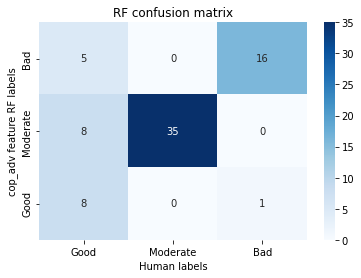

In [518]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [519]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature RF Sensitivity: 
 Good prediction: 38.095238095238095 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [520]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature RF Precision: 
 Good prediction: 88.88888888888889 
 Moderate prediction 81.3953488372093 
 Bad prediction 76.19047619047619


### kinematic features

In [521]:
kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
kine_SVC_grid_search.fit(kine_x_train, y_train.ravel())
kine_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [522]:
kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
kine_DT_grid_search.fit(kine_x_train, y_train)
kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [523]:
kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
kine_RF_grid_search.fit(kine_x_train, y_train)
kine_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 200}

In [524]:
kine_SVC_best_reg = kine_SVC_grid_search.best_estimator_
kine_DT_best_reg = kine_DT_grid_search.best_estimator_
kine_RF_best_reg = kine_RF_grid_search.best_estimator_

In [525]:
kine_SVC_best_reg.score(kine_x_test, y_test.ravel())

0.9452054794520548

In [526]:
kine_DT_best_reg.score(kine_x_test, y_test.ravel())

0.821917808219178

In [527]:
kine_RF_best_reg.score(kine_x_test, y_test.ravel())

0.9041095890410958

[Text(525.1764705882352, 996.6, 'std_vertical_xCOM <= -0.568\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(262.5882352941176, 815.4000000000001, 'std_ML_xCOM <= -1.107\nentropy = 0.98\nsamples = 62\nvalue = [43, 18, 1]\nclass = Good'),
 Text(131.2941176470588, 634.2, 'std_vertical_aCOM <= 0.399\nentropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(65.6470588235294, 453.0, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0]\nclass = Moderate'),
 Text(196.94117647058823, 453.0, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Good'),
 Text(393.88235294117646, 634.2, 'max_AP_vCOM <= -1.024\nentropy = 0.312\nsamples = 44\nvalue = [42, 1, 1]\nclass = Good'),
 Text(328.235294117647, 453.0, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Moderate'),
 Text(459.52941176470586, 453.0, 'std_ML_vCOM <= -1.072\nentropy = 0.159\nsamples = 43\nvalue = [42, 0, 1]\nclass = Good'),
 Text(393.88235294117646, 271.79999999999995, 'entropy = 0

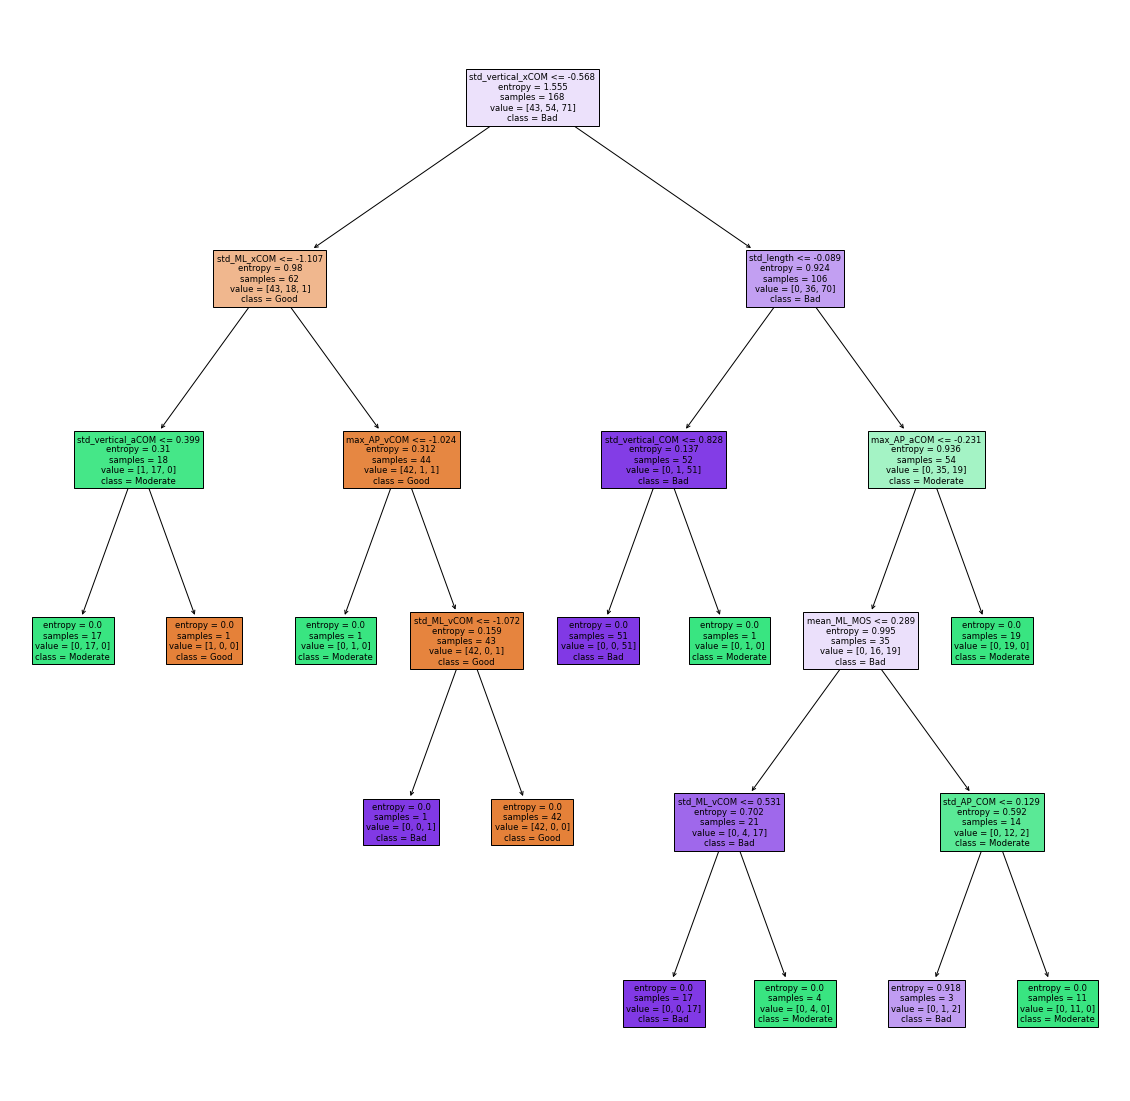

In [528]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_DT_best_reg, 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(496.0, 951.3000000000001, 'std_vertical_xCOM <= -0.558\ngini = 0.658\nsamples = 112\nvalue = [47, 53, 68]\nclass = Bad'),
 Text(248.0, 679.5, 'std_ML_COM <= -1.332\ngini = 0.346\nsamples = 40\nvalue = [47, 12, 1]\nclass = Good'),
 Text(124.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]\nclass = Moderate'),
 Text(372.0, 407.70000000000005, 'mean_ML_DS_MOS <= 1.446\ngini = 0.295\nsamples = 38\nvalue = [47, 9, 1]\nclass = Good'),
 Text(248.0, 135.89999999999998, 'gini = 0.129\nsamples = 30\nvalue = [41, 2, 1]\nclass = Good'),
 Text(496.0, 135.89999999999998, 'gini = 0.497\nsamples = 8\nvalue = [6, 7, 0]\nclass = Moderate'),
 Text(744.0, 679.5, 'std_length <= -0.216\ngini = 0.471\nsamples = 72\nvalue = [0, 41, 67]\nclass = Bad'),
 Text(620.0, 407.70000000000005, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 38]\nclass = Bad'),
 Text(868.0, 407.70000000000005, 'max_AP_aCOM <= -0.355\ngini = 0.485\nsamples = 42\nvalue = [0, 41, 29]\nclass = Moderate'),
 Text(744.0, 135.

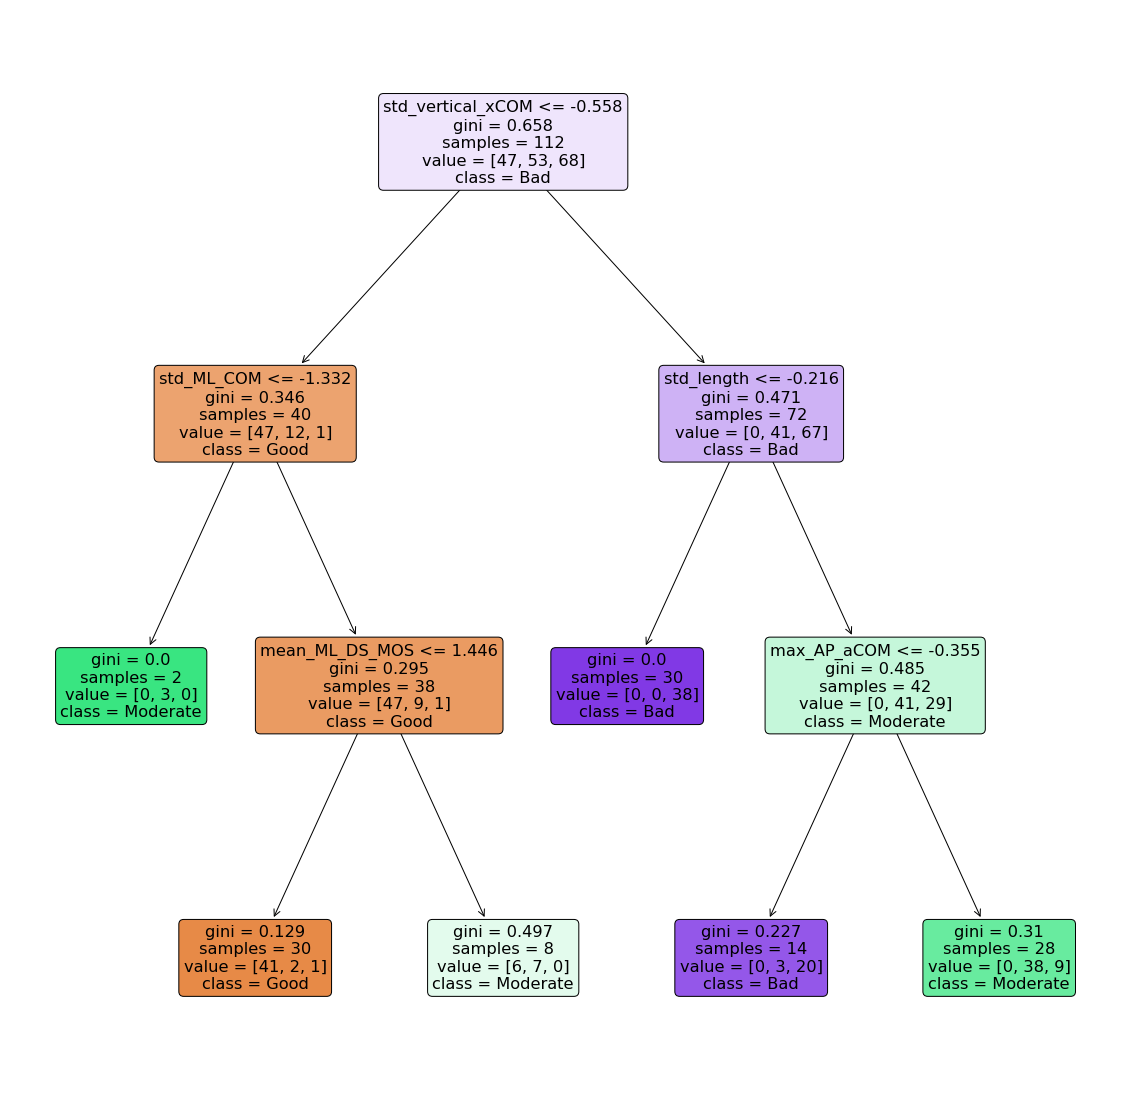

In [529]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_RF_best_reg.estimators_[0], 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [530]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [531]:
acc_3_t = accuracy_score(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine SVC
acc: 0.945
recall: 0.937
precision: 0.947


Text(0.5, 1.0, 'SVC confusion matrix')

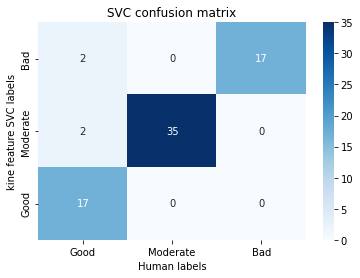

In [532]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [533]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature SVC Sensitivity: 
 Good prediction: 80.95238095238095 
 Moderate prediction 100.0 
 Bad prediction 100.0


In [534]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature SVC Precision: 
 Good prediction: 100.0 
 Moderate prediction 94.5945945945946 
 Bad prediction 89.47368421052632


In [535]:
acc_3_t = accuracy_score(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine DT
acc: 0.822
recall: 0.801
precision: 0.793


Text(0.5, 1.0, 'DT confusion matrix')

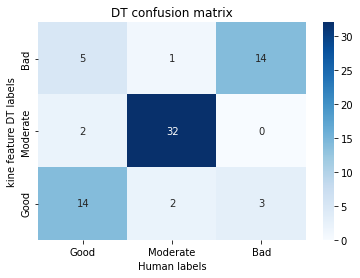

In [536]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [537]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature DT Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 91.42857142857143 
 Bad prediction 82.35294117647058


In [538]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature DT Precision: 
 Good prediction: 73.68421052631578 
 Moderate prediction 94.11764705882352 
 Bad prediction 70.0


In [539]:
acc_3_t = accuracy_score(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine RF
acc: 0.904
recall: 0.889
precision: 0.91


Text(0.5, 1.0, 'RF confusion matrix')

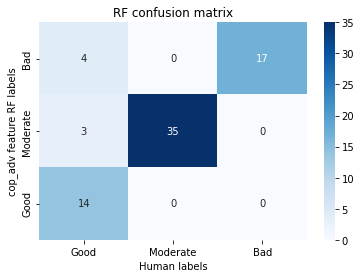

In [540]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [541]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature RF Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 100.0 
 Bad prediction 100.0


In [542]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature RF Precision: 
 Good prediction: 100.0 
 Moderate prediction 92.10526315789474 
 Bad prediction 80.95238095238095


### non kinematic features

In [543]:
non_kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
non_kine_SVC_grid_search.fit(non_kine_x_train, y_train.ravel())
non_kine_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [544]:
non_kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
non_kine_DT_grid_search.fit(non_kine_x_train, y_train)
non_kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [545]:
non_kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
non_kine_RF_grid_search.fit(non_kine_x_train, y_train)
non_kine_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 200}

In [546]:
non_kine_SVC_best_reg = non_kine_SVC_grid_search.best_estimator_
non_kine_DT_best_reg = non_kine_DT_grid_search.best_estimator_
non_kine_RF_best_reg = non_kine_RF_grid_search.best_estimator_

In [547]:
non_kine_SVC_best_reg.score(non_kine_x_test, y_test.ravel())

0.6164383561643836

In [548]:
non_kine_DT_best_reg.score(non_kine_x_test, y_test.ravel())

0.6986301369863014

In [549]:
non_kine_RF_best_reg.score(non_kine_x_test, y_test.ravel())

0.6575342465753424

[Text(604.5, 978.48, 'std_AP_aCOP <= -0.184\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(372.0, 761.0400000000001, 'std_AP_IA <= 1.077\nentropy = 1.252\nsamples = 96\nvalue = [8, 29, 59]\nclass = Bad'),
 Text(186.0, 543.6, 'std_AP_IA <= -1.339\nentropy = 1.119\nsamples = 88\nvalue = [4, 26, 58]\nclass = Bad'),
 Text(93.0, 326.1600000000001, 'entropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = Moderate'),
 Text(279.0, 326.1600000000001, 'std_AP_IA <= -0.405\nentropy = 1.038\nsamples = 81\nvalue = [3, 21, 57]\nclass = Bad'),
 Text(186.0, 108.72000000000003, 'entropy = 0.535\nsamples = 32\nvalue = [1, 2, 29]\nclass = Bad'),
 Text(372.0, 108.72000000000003, 'entropy = 1.18\nsamples = 49\nvalue = [2, 19, 28]\nclass = Bad'),
 Text(558.0, 543.6, 'std_AP_IA <= 1.241\nentropy = 1.406\nsamples = 8\nvalue = [4, 3, 1]\nclass = Good'),
 Text(465.0, 326.1600000000001, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(651.0, 326.1600000000001, '

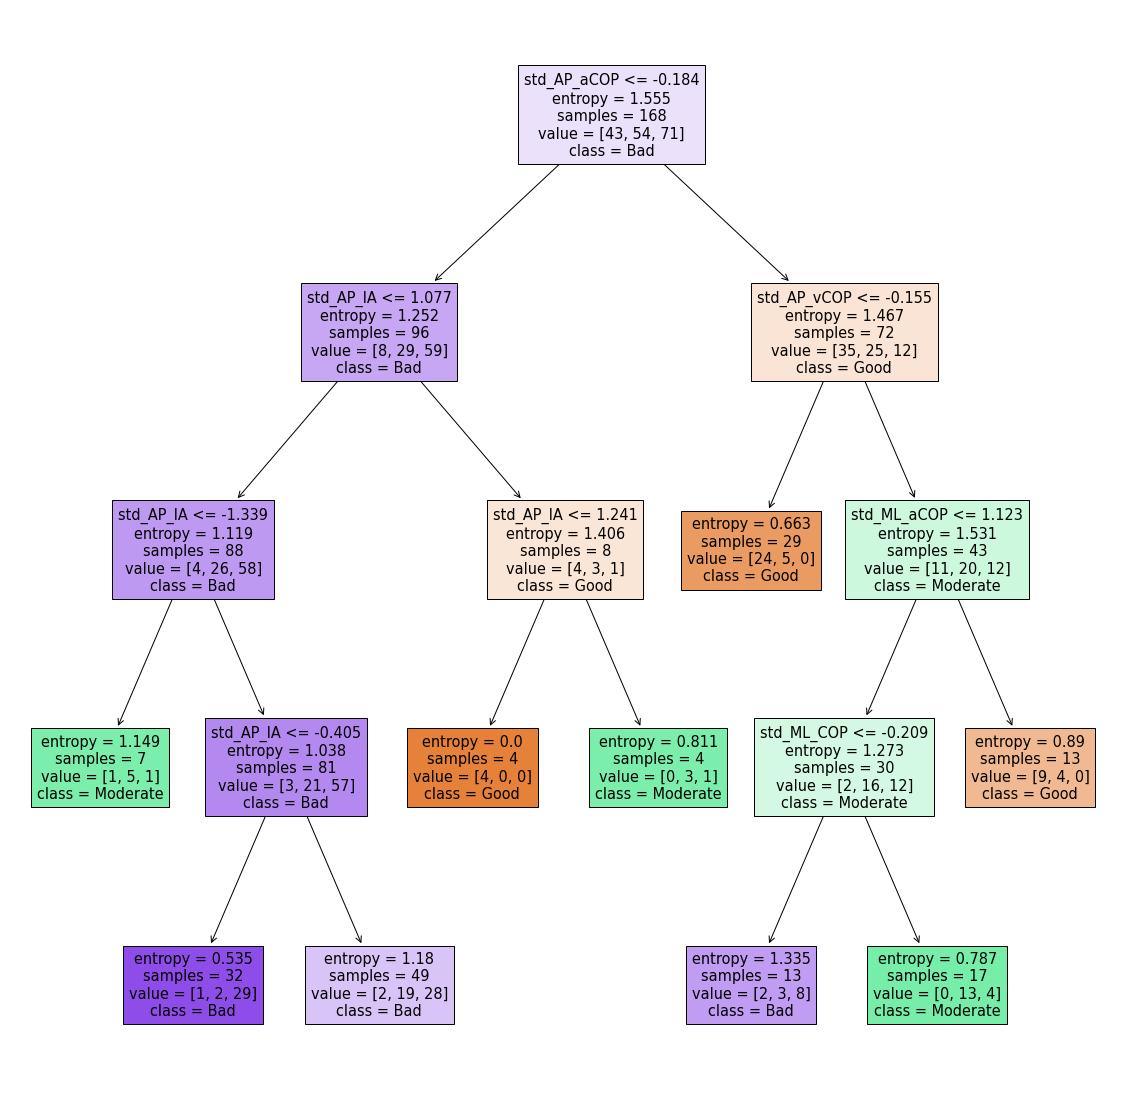

In [550]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_DT_best_reg, 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_aCOP <= -0.184\nentropy = 1.54\nsamples = 106\nvalue = [41, 52, 75]\nclass = Bad'),
 Text(279.0, 679.5, 'std_AP_vCOP <= -0.428\nentropy = 1.2\nsamples = 60\nvalue = [5, 30, 54]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_aCOP <= -0.889\nentropy = 1.42\nsamples = 19\nvalue = [4, 14, 8]\nclass = Moderate'),
 Text(69.75, 135.89999999999998, 'entropy = 0.544\nsamples = 5\nvalue = [1, 7, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'entropy = 1.481\nsamples = 14\nvalue = [3, 7, 8]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_ML_vCOP <= 1.216\nentropy = 0.928\nsamples = 41\nvalue = [1, 16, 46]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'entropy = 0.87\nsamples = 40\nvalue = [1, 13, 46]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 3, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_vCOP <= -0.155\nentropy = 1.538\nsamples = 46\nvalue = [36, 22, 21]\nclass = Good')

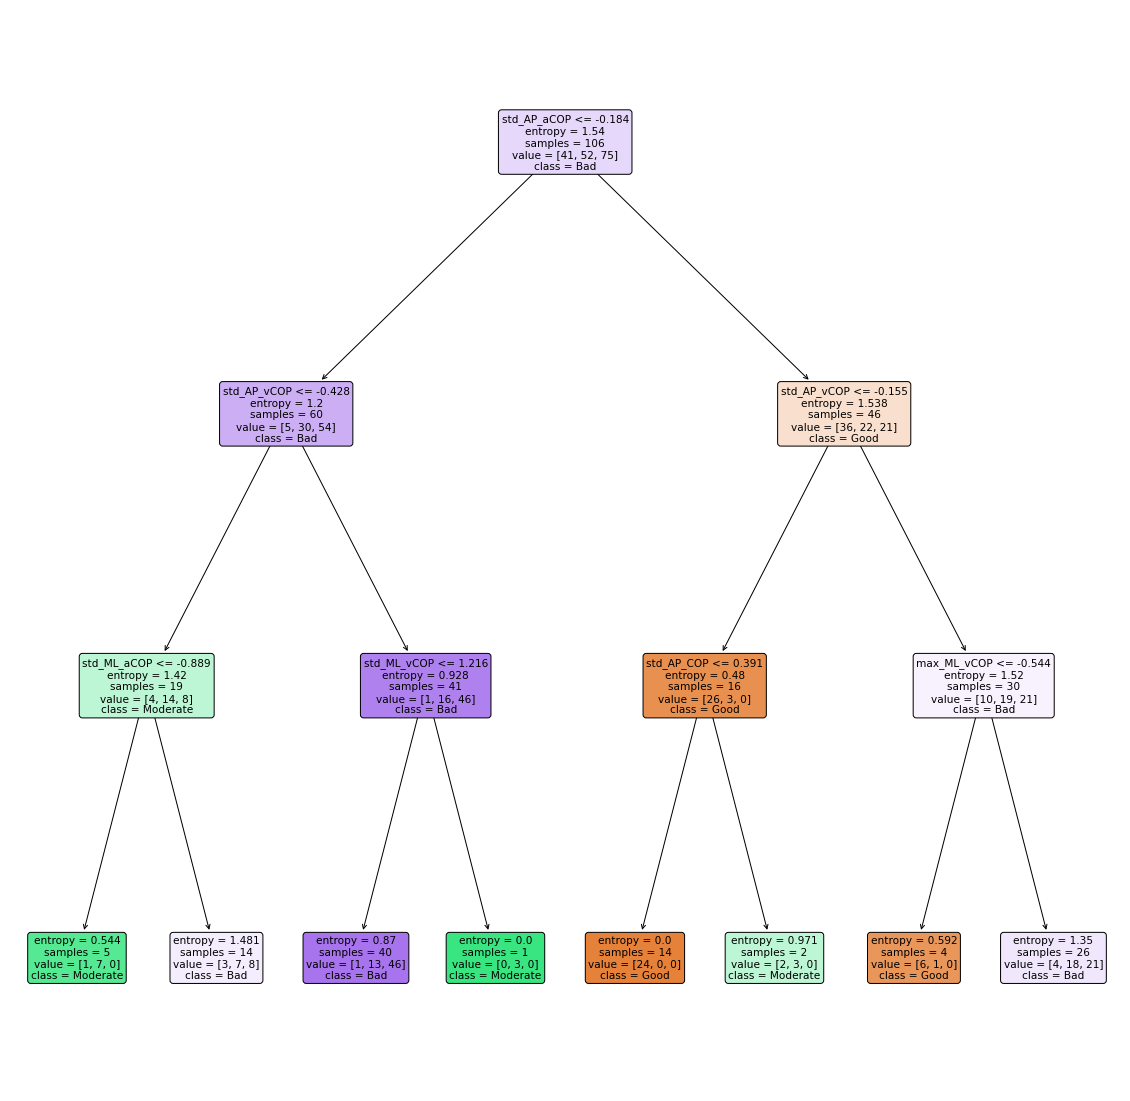

In [551]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_RF_best_reg.estimators_[0], 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [552]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [553]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine SVC
acc: 0.616
recall: 0.581
precision: 0.553


Text(0.5, 1.0, 'SVC confusion matrix')

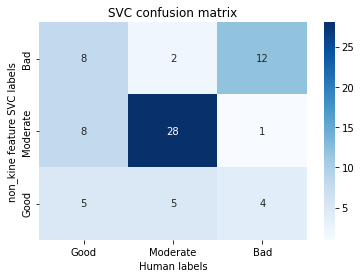

In [554]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [555]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature SVC Sensitivity: 
 Good prediction: 23.809523809523807 
 Moderate prediction 80.0 
 Bad prediction 70.58823529411765


In [556]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature SVC Precision: 
 Good prediction: 35.714285714285715 
 Moderate prediction 75.67567567567568 
 Bad prediction 54.54545454545454


In [557]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine DT
acc: 0.699
recall: 0.664
precision: 0.657


Text(0.5, 1.0, 'DT confusion matrix')

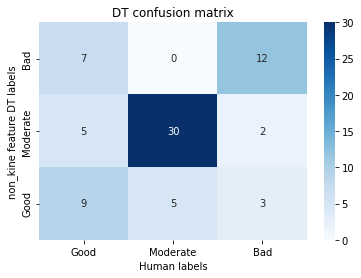

In [558]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [559]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature DT Sensitivity: 
 Good prediction: 42.857142857142854 
 Moderate prediction 85.71428571428571 
 Bad prediction 70.58823529411765


In [560]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature DT Precision: 
 Good prediction: 52.94117647058824 
 Moderate prediction 81.08108108108108 
 Bad prediction 63.1578947368421


In [561]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine RF
acc: 0.658
recall: 0.619
precision: 0.634


Text(0.5, 1.0, 'RF confusion matrix')

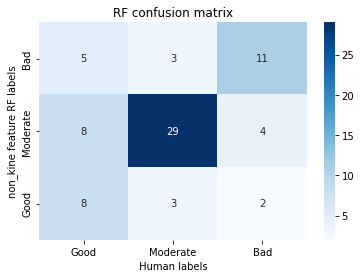

In [562]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [563]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature RF Sensitivity: 
 Good prediction: 38.095238095238095 
 Moderate prediction 82.85714285714286 
 Bad prediction 64.70588235294117


In [564]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature RF Precision: 
 Good prediction: 61.53846153846154 
 Moderate prediction 70.73170731707317 
 Bad prediction 57.89473684210527


In [565]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

In [566]:
onehotencoder = OneHotEncoder()
onehot_targets = onehotencoder.fit_transform(y_test.reshape(-1, 1)).toarray()
targets_bad = onehot_targets[:,0]

In [567]:
targets_bad

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.])

In [568]:
all_predictions = all_RF_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_RF_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_RF_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_RF_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_RF_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_RF_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_RF_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_RF_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_RF_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [569]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [570]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'RF')

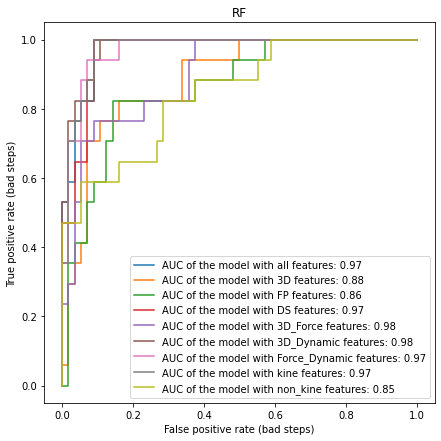

In [571]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("RF")

In [572]:
all_predictions = all_DT_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_DT_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_DT_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_DT_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_DT_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_DT_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_DT_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_DT_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_DT_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [573]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [574]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'DT')

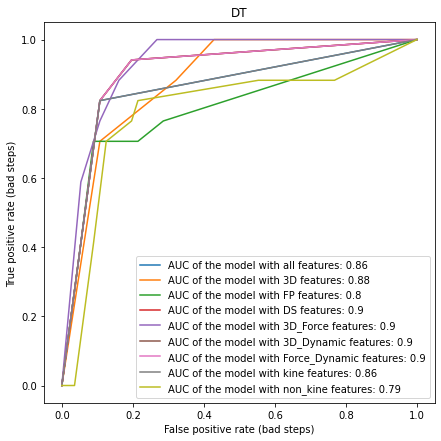

In [575]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("DT")

Text(0.5, 0, 'important')

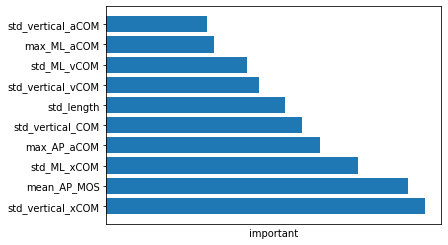

In [576]:
importance = all_RF_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = [1,2,3,4,5,6,7,8,9,10]
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

Text(0.5, 0, 'important')

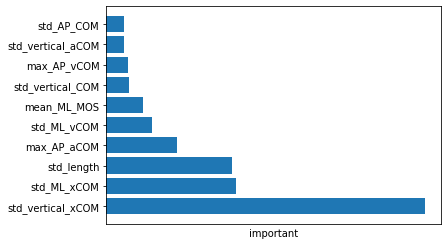

In [577]:
importance = all_DT_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = range(1,11)
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

In [578]:
importance_sorted_df.head()

importance           features
26    0.396315  std_vertical_xCOM
25    0.160441        std_ML_xCOM
13    0.156077         std_length
10    0.087450        max_AP_aCOM
4     0.057083        std_ML_vCOM

In [579]:
all_DT_best_reg.feature_importances_

array([0.02139284, 0.        , 0.02758657, 0.        , 0.05708257,
       0.        , 0.02651425, 0.        , 0.0215602 , 0.        ,
       0.08745038, 0.        , 0.        , 0.1560772 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16044129, 0.39631522, 0.        , 0.04557949, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [580]:
df

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0    sub01    213.4662      8.8350           14.6141    762.4613     32.8951   
1    sub01    213.5305      2.9755           13.6819    758.7181     11.3566   
2    sub01    205.2074      5.9922           13.2110    733.4199     23.4083   
3    sub01    215.8366      5.4087           14.6840    761.7351     21.3881   
4    sub01    207.8313      5.5818           13.5413    742.6170     20.4367   
..     ...         ...         ...               ...         ...         ...   
236  sub19    201.2677      6.5163           11.9298    713.4677     20.0045   
237  sub19    188.6476      5.9377           12.3415    670.4328     24.8044   
238  sub19    191.4153      6.3142           11.4711    677.7617     22.6031   
239  sub19    193.1004      6.0490           13.2717    688.5787     22.9212   
240  sub19    187.4260      5.3149           12.7583    667.3850     19.6978   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
0       295.8255     180.9047           330.0996    2272.8799  ...   
1       281.6698     153.5744           311.0343    2318.2098  ...   
2       286.7895     136.7172           293.6041    2108.8232  ...   
3       240.6370     170.3688           371.8024    3568.5125  ...   
4       335.7397     131.9642           340.5659    3722.7436  ...   
..           ...          ...                ...          ...  ...   
236     287.5772     234.1197           304.7143    2353.9567  ...   
237     341.3093     242.4716           324.1226    2329.0708  ...   
238     284.3857     224.5758           321.3560    3470.2402  ...   
239     325.9696     209.8955           339.8393    3479.2211  ...   
240     309.9226     204.0316           321.2217    3286.9233  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
0      -98.0258    646.5060    225.9099      1.2640     4.66680     7.9475   
1     -126.8227    381.7673    261.3699      1.1772    -4.65630     8.0284   
2     -115.8622    823.2821    214.5069     21.1584    -6.57450     2.6338   
3     -119.4112    413.4972    251.4558     -2.8516     4.39270     7.4854   
4     -109.1963    891.0632    225.6116     -1.5906    -4.74890     7.9923   
..          ...         ...         ...         ...         ...        ...   
236   -155.9743    771.4628    250.0597     15.6049    -0.18459    10.8262   
237   -155.9902    774.4695    232.4082      3.7143    -3.34920     6.8656   
238   -142.1886    784.6741    249.1399     -4.4342     2.85530     7.0454   
239   -125.6791    797.5757    218.8679     -3.9786    -3.66490     7.2750   
240   -121.0935    747.5317    132.7840     -4.2705     2.89950     6.9911   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
0       2.1534    28.9237    12.1212                Good  
1       2.4178    28.6518    11.5975                Good  
2       1.1421     8.1273     3.8470                Good  
3       2.1760    27.1330    11.7784                Good  
4       2.2845    29.7887    11.2230                Good  
..         ...        ...        ...                 ...  
236     1.4380    40.5061     6.1237                 Bad  
237     1.3452    25.3778     7.0560                 Bad  
238     2.0511    25.7831     9.2359                 Bad  
239     2.6098    27.0212    10.2626                 Bad  
240     2.4641    25.4004    10.5063                 Bad  

[241 rows x 71 columns]

## T-test

In [581]:
import scipy.stats as stats

In [582]:
def grouping_columns_infor(targeted_columns):
    col_infor = df[["target_performance", targeted_columns]]
    good_class = col_infor[col_infor["target_performance"] == "Good"][targeted_columns]
    mod_class = col_infor[col_infor["target_performance"] == "Moderate"][targeted_columns]
    bad_class = col_infor[col_infor["target_performance"] == "Bad"][targeted_columns]
    return [good_class, mod_class, bad_class]

### std_length

In [583]:
[good_std_length, mod_std_length, bad_std_length] = grouping_columns_infor(targeted_columns = "std_length")

In [584]:
good_M = round(good_std_length.mean(),3)
mod_M = round(mod_std_length.mean(),3)
bad_M = round(bad_std_length.mean(),3)
good_S = round(good_std_length.std(),3)
mod_S = round(mod_std_length.std(),3)
bad_S = round(bad_std_length.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:210.552, STD:7.288 
 Mod: M:194.72, STD:9.796 
 bad: M:204.592, STD:10.009 



In [585]:
good_std_length.mean()

210.55221733333335

In [586]:
t = stats.ttest_ind(good_std_length, mod_std_length).statistic
p = stats.ttest_ind(good_std_length, mod_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 11.861820258127535, p = 0.0


In [587]:
t = stats.ttest_ind(good_std_length, bad_std_length).statistic
p = stats.ttest_ind(good_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 4.000602705295138, p = 0.0


In [588]:
t = stats.ttest_ind(mod_std_length, bad_std_length).statistic
p = stats.ttest_ind(mod_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -6.1889803585786245, p = 0.0


### std_vertical_xCOM

In [589]:
[good_std_vertical_xCOM, mod_std_vertical_xCOM, bad_std_vertical_xCOM] = grouping_columns_infor(targeted_columns = "std_vretical_xCOM")

In [590]:
good_M = round(good_std_vertical_xCOM.mean(),3)
mod_M = round(mod_std_vertical_xCOM.mean(),3)
bad_M = round(bad_std_vertical_xCOM.mean(),3)
good_S = round(good_std_vertical_xCOM.std(),3)
mod_S = round(mod_std_vertical_xCOM.std(),3)
bad_S = round(bad_std_vertical_xCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:0.072, STD:0.023 
 Mod: M:0.075, STD:0.012 
 bad: M:0.045, STD:0.006 



In [591]:
t = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -1.3170652411339243, p = 0.19


In [592]:
t = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 8.709731335233894, p = 0.0


In [593]:
t = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 18.127682380781145, p = 0.0


### max_ML_aCOM

In [594]:
[good_max_ML_aCOM, mod_max_ML_aCOM, bad_max_ML_aCOM] = grouping_columns_infor(targeted_columns = "max_ML_aCOM")

In [595]:
good_M = round(good_max_ML_aCOM.mean(),3)
mod_M = round(mod_max_ML_aCOM.mean(),3)
bad_M = round(bad_max_ML_aCOM.mean(),3)
good_S = round(good_max_ML_aCOM.std(),3)
mod_S = round(mod_max_ML_aCOM.std(),3)
bad_S = round(bad_max_ML_aCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:147531.667, STD:88562.149 
 Mod: M:81215.109, STD:46548.267 
 bad: M:315563.77, STD:412997.198 



In [596]:
t = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 6.542016628777621, p = 0.0


In [597]:
t = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -3.429322937800219, p = 0.001


In [598]:
t = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -5.790703706349025, p = 0.0


### mean_ML_MOS

In [599]:
[good_mean_ML_MOS, mod_mean_ML_MOS, bad_mean_ML_MOS] = grouping_columns_infor(targeted_columns = "mean_ML_MOS")

In [600]:
good_M = round(good_mean_ML_MOS.mean(),3)
mod_M = round(mod_mean_ML_MOS.mean(),3)
bad_M = round(bad_mean_ML_MOS.mean(),3)
good_S = round(good_mean_ML_MOS.std(),3)
mod_S = round(mod_mean_ML_MOS.std(),3)
bad_S = round(bad_mean_ML_MOS.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:-18.583, STD:15.491 
 Mod: M:-23.176, STD:15.265 
 bad: M:-25.431, STD:20.298 



In [601]:
t = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 1.9819049519336438, p = 0.049


In [602]:
t = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 2.2231056078440137, p = 0.028


In [603]:
t = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 0.8093807502437164, p = 0.419


In [604]:
all_clear_corr_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance']

In [605]:
all_clear_corr_df.to_csv("C:/Users/a1003/OneDrive/桌面/Thesis/feature_comparison/4_markers_df.csv")

In [606]:
all_clear_corr_df

std_AP_COM  std_ML_COM  std_vertical_COM  std_AP_vCOM  std_ML_vCOM  \
0      213.4662      8.8350           14.6141     295.8255     180.9047   
1      213.5305      2.9755           13.6819     281.6698     153.5744   
2      205.2074      5.9922           13.2110     286.7895     136.7172   
3      215.8366      5.4087           14.6840     240.6370     170.3688   
4      207.8313      5.5818           13.5413     335.7397     131.9642   
..          ...         ...               ...          ...          ...   
236    201.2677      6.5163           11.9298     287.5772     234.1197   
237    188.6476      5.9377           12.3415     341.3093     242.4716   
238    191.4153      6.3142           11.4711     284.3857     224.5758   
239    193.1004      6.0490           13.2717     325.9696     209.8955   
240    187.4260      5.3149           12.7583     309.9226     204.0316   

     std_vertical_vCOM  max_AP_vCOM  max_ML_vCOM  std_vertical_aCOM  \
0             330.0996    2272.8799     470.9540         14117.9315   
1             311.0343    2318.2098     306.5292         19403.6269   
2             293.6041    2108.8232     364.3952         19200.1215   
3             371.8024    3568.5125     402.4977         20951.3061   
4             340.5659    3722.7436     391.4783         16869.8264   
..                 ...          ...          ...                ...   
236           304.7143    2353.9567     704.2167         19025.0409   
237           324.1226    2329.0708     833.2080         27122.7452   
238           321.3560    3470.2402     667.6970         22567.2154   
239           339.8393    3479.2211     384.2181         16177.2507   
240           321.2217    3286.9233     459.9755         17316.3661   

     max_ML_aCOM  ...  mean_ML_DS_MOS  max_ML_MOS  min_AP_MOS  min_ML_MOS  \
0     78792.6019  ...       81.271500    127.8841   -704.6114    -98.0258   
1    229902.8731  ...       76.411700    134.5472   -468.1059   -126.8227   
2    137910.9356  ...       26.946800     98.6447   -895.3213   -115.8622   
3    156909.7872  ...       81.661400    132.0445   -505.5675   -119.4112   
4    229196.4708  ...       85.428600    116.4154   -947.0555   -109.1963   
..           ...  ...             ...         ...         ...         ...   
236  206215.3578  ...       50.122200     94.0854   -920.2868   -155.9743   
237  480190.3075  ...       38.082300     76.4181   -895.1148   -155.9902   
238  163788.0070  ...       41.665200    106.9514   -906.9975   -142.1886   
239  124544.5804  ...       47.078600     93.1888   -918.4092   -125.6791   
240  300733.8131  ...       43.287152     11.6905   -858.5178   -121.0935   

     ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  std_ML_IA  \
0      225.9099      1.2640     4.66680     7.9475     2.1534   
1      261.3699      1.1772    -4.65630     8.0284     2.4178   
2      214.5069     21.1584    -6.57450     2.6338     1.1421   
3      251.4558     -2.8516     4.39270     7.4854     2.1760   
4      225.6116     -1.5906    -4.74890     7.9923     2.2845   
..          ...         ...         ...        ...        ...   
236    250.0597     15.6049    -0.18459    10.8262     1.4380   
237    232.4082      3.7143    -3.34920     6.8656     1.3452   
238    249.1399     -4.4342     2.85530     7.0454     2.0511   
239    218.8679     -3.9786    -3.66490     7.2750     2.6098   
240    132.7840     -4.2705     2.89950     6.9911     2.4641   

     target_performance  
0                  Good  
1                  Good  
2                  Good  
3                  Good  
4                  Good  
..                  ...  
236                 Bad  
237                 Bad  
238                 Bad  
239                 Bad  
240                 Bad  

[241 rows x 42 columns]